# L'option de la suretée : La paire EUR/ZMW

L'analyse de la paire EUR/ZMW (Euro/Zambian Kwacha) offrira une perspective précieuse sur la gestion des devises à faible rendement et faible risque. En étudiant l'EUR/ZMW, nous pourrons comprendre comment naviguer dans un environnement de marché caractérisé par des fluctuations limitées, tout en cherchant à optimiser les stratégies d'investissement.

Cette étude contribuera à la création de modèles prédictifs robustes pour élaborer des stratégies adaptées aux marchés financiers à faible volatilité. La capacité à identifier les moments opportuns pour entrer et sortir du marché sera essentielle pour maximiser les rendements tout en minimisant les risques, même dans des conditions de faible volatilité.

La visualisation graphique des fluctuations de l'EUR/ZMW enrichira notre compréhension des dynamiques de marché spécifiques à cette paire de devises. Cette approche nous permettra de mieux anticiper les mouvements futurs et de comparer l'efficacité de différents modèles prédictifs selon le profil de volatilité et de rendement des devises.

## Installation des packages et importations des librairies

In [4]:
pip install ta

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
# import plotly.express as px
# import plotly.graph_objects as go
import ta
import numpy as np
# import xgboost as xgb
# from prophet import Prophet
#from arch import arch_model

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

## Importation du dataset et analyse de sa structure et des données macro

In [2]:
eurzmw_data = pd.read_csv("EURZMW=X.csv")
eurzmw_data

Date       Open       High      Low      Close  Adj Close  Volume
0     2013-01-03   6.783000   6.783000   6.7830   6.843000   6.843000     0.0
1     2013-01-04   6.719800   6.719800   6.7198   6.783000   6.783000     0.0
2     2013-01-07   6.810100   6.810100   6.8078   6.719800   6.719800     0.0
3     2013-01-08   6.757300   6.757300   6.7573   6.807800   6.807800     0.0
4     2013-01-09   6.731900   6.731900   6.7319   6.757300   6.757300     0.0
...          ...        ...        ...      ...        ...        ...     ...
2968  2024-05-21  28.023001  28.023001  28.0130  28.023001  28.023001     0.0
2969  2024-05-22  28.013000  28.209000  28.0130  28.013000  28.013000     0.0
2970  2024-05-23  28.209000  28.663000  28.2090  28.209000  28.209000     0.0
2971  2024-05-24  28.663000  28.884001  28.6630  28.663000  28.663000     0.0
2972  2024-05-24  28.663700  29.031300  28.6621  28.953400  28.953400     0.0

[2973 rows x 7 columns]

In [8]:
# Stats basiques
print("Nombre de lignes : {}".format(eurzmw_data.shape[0]))
print()

print("Display du dataset: ")
display(eurzmw_data.head())
print()

print("Basique stats: ")
data_desc = eurzmw_data.describe(include='all')
display(data_desc)
print()

print("Pourcentage de missing values: ")
display(100*eurzmw_data.isnull().sum()/eurzmw_data.shape[0])

Nombre de lignes : 2973

Display du dataset: 


Date    Open    High     Low   Close  Adj Close  Volume
0  2013-01-03  6.7830  6.7830  6.7830  6.8430     6.8430     0.0
1  2013-01-04  6.7198  6.7198  6.7198  6.7830     6.7830     0.0
2  2013-01-07  6.8101  6.8101  6.8078  6.7198     6.7198     0.0
3  2013-01-08  6.7573  6.7573  6.7573  6.8078     6.8078     0.0
4  2013-01-09  6.7319  6.7319  6.7319  6.7573     6.7573     0.0


Basique stats: 


Date         Open         High          Low        Close  \
count         2973  2968.000000  2968.000000  2968.000000  2968.000000   
unique        2972          NaN          NaN          NaN          NaN   
top     2024-05-24          NaN          NaN          NaN          NaN   
freq             2          NaN          NaN          NaN          NaN   
mean           NaN    14.804929    14.857073    14.763148    14.807508   
std            NaN     6.230369     6.248943     6.217095     6.232670   
min            NaN     6.719800     6.719800     6.719800     6.719800   
25%            NaN    10.169475    10.202725    10.152200    10.166825   
50%            NaN    13.353750    13.401800    13.323500    13.353750   
75%            NaN    19.816800    19.854674    19.748749    19.818551   
max            NaN    29.527000    29.527000    29.337000    29.527000   

          Adj Close  Volume  
count   2968.000000  2968.0  
unique          NaN     NaN  
top             NaN     NaN  
freq            NaN     NaN  
mean      14.807508     0.0  
std        6.232670     0.0  
min        6.719800     0.0  
25%       10.166825     0.0  
50%       13.353750     0.0  
75%       19.818551     0.0  
max       29.527000     0.0


Pourcentage de missing values: 


Date         0.00000
Open         0.16818
High         0.16818
Low          0.16818
Close        0.16818
Adj Close    0.16818
Volume       0.16818
dtype: float64

In [3]:
eurzmw_data.dropna(inplace=True)

In [4]:
# Conversion de la colonne Date en format datetime et définition comme index
eurzmw_data['Date'] = pd.to_datetime(eurzmw_data['Date'])
eurzmw_data.set_index('Date', inplace=True)

## Analyse des variables

#### 1. L'analyse des prix de cloture

 Nous analysons les prix de clôture car ils reflètent le consensus du marché sur la valeur d'un actif à la fin de chaque journée de trading.

In [11]:
# Graphique interactif des prix de clôture
fig_close = px.line(eurzmw_data, x=eurzmw_data.index, y='Close', title='Prix de clôture de la paire EUR/ZMW')
fig_close.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_close.show()

L'analyse des graphiques révèle une tendance haussière soutenue de la paire EUR/ZMW sur le long terme, avec des périodes de stabilité et de correction à court terme. La volatilité reste modérée, ce qui correspond au profil de risque faible et de rendement modéré de cette paire.

#### 2. L'analyse des rendements quotidiens

Nous commencerons par diviser chaque prix de clôture par le prix de clôture du jour précédent, puis appliquerons un logarithme naturel. Les rendements logarithmiques sont additifs sur le temps et tendent à être plus normalement distribués, ce qui facilite l'analyse statistique.

In [5]:
# Calcul des rendements quotidiens logarithmiques
eurzmw_data['Log Returns'] = np.log(eurzmw_data['Close'] / eurzmw_data['Close'].shift(1))

In [13]:
# Graphique interactif des rendements quotidiens
fig_returns = px.line(eurzmw_data, x=eurzmw_data.index, y='Log Returns', title='Rendements Quotidiens de la paire EUR/ZMW')
fig_returns.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_returns.show()


L'analyse des rendements quotidiens de la paire EUR/ZMW confirme une volatilité modérée avec des pics occasionnels de volatilité élevés liés à des événements macroéconomiques spécifiques. Sur les dernières années, une tendance vers une stabilisation accrue est observable, particulièrement depuis 2023. Cette analyse suggère que les modèles prédictifs pour cette paire de devises devraient se concentrer sur la capture des tendances à long terme avec une sensibilité aux fluctuations modérées, en utilisant des approches comme les modèles ARIMA et les modèles de régression linéaire.

#### 3. Calcul des moyennes mobiles.

Le calcul des moyennes mobiles sur 3, 7, 15 et 30 jours lisse les fluctuations quotidiennes des prix de clôture, aidant à identifier les tendances sous-jacentes et à générer des signaux de trading.

* Moyenne Mobile sur 3 Jours : Capture les mouvements à très court terme, utile pour détecter des changements rapides de tendance.
* Moyenne Mobile sur 7 Jours : Fournit une vue à court terme, filtrant les fluctuations mineures pour mieux visualiser les tendances hebdomadaires.
* Moyenne Mobile sur 15 Jours : Aide à identifier les tendances à moyen terme, éliminant les bruits de marché sur une période de deux semaines.
* Moyenne Mobile sur 30 Jours : Fournit une perspective à plus long terme, aidant à lisser les fluctuations quotidiennes et à révéler les tendances sous-jacentes sur un mois.

Ces techniques combinées éliminent les bruits de marché pour fournir une vue plus claire des mouvements de prix, facilitant la prise de décisions de trading informées et l'optimisation des stratégies d'investissement.

In [6]:
# Calcul des moyennes mobiles sur 3, 7, 15 et 30 jours
eurzmw_data['3D MA'] = eurzmw_data['Close'].rolling(window=3).mean()
eurzmw_data['7D MA'] = eurzmw_data['Close'].rolling(window=7).mean()
eurzmw_data['15D MA'] = eurzmw_data['Close'].rolling(window=15).mean()
eurzmw_data['30D MA'] = eurzmw_data['Close'].rolling(window=30).mean()

In [15]:
# Création de la figure des moyennes mobiles sur 3, 7, 15 et 30 jours
fig = go.Figure()

# Ajouter les traces pour les prix de clôture et les moyennes mobiles
fig.add_trace(go.Scatter(x=eurzmw_data.index, y=eurzmw_data['Close'], mode='lines', name='Prix de clôture'))
fig.add_trace(go.Scatter(x=eurzmw_data.index, y=eurzmw_data['3D MA'], mode='lines', name='Moyenne mobile 3 jours'))
fig.add_trace(go.Scatter(x=eurzmw_data.index, y=eurzmw_data['7D MA'], mode='lines', name='Moyenne mobile 7 jours'))
fig.add_trace(go.Scatter(x=eurzmw_data.index, y=eurzmw_data['15D MA'], mode='lines', name='Moyenne mobile 15 jours'))
fig.add_trace(go.Scatter(x=eurzmw_data.index, y=eurzmw_data['30D MA'], mode='lines', name='Moyenne mobile 30 jours'))

# Mets à jour les axes et le titre
fig.update_layout(
    title='Comparaison des Moyennes Mobiles 3, 7, 15 et 30 Jours',
    xaxis_title='Date',
    yaxis_title='Prix',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=5, label="5y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    ),
    yaxis=dict(fixedrange=False)
)

fig.show()


Les différentes moyennes mobiles montrent des perspectives variées sur la tendance des prix de la paire EUR/ZMW :

* Court Terme (3D et 7D MA) : Sensibles aux fluctuations et utiles pour les traders à court terme. Elles peuvent cependant générer des faux signaux.
* Moyen Terme (15D MA) : Offre un bon équilibre entre réactivité et stabilité des tendances, utile pour les traders à moyen terme.
* Long Terme (30D MA) : Idéale pour identifier les tendances à long terme, mais moins réactive aux changements rapides.

Les moyennes mobiles peuvent être utilisées de manière combinée pour élaborer des stratégies de trading robustes. Notre stratégie sera de combiner les signaux d'une moyenne mobile courte (7D) pour entrer dans le marché et d'une moyenne mobile longue (30D) pour confirmer la tendance.

#### 4. Calcul des bandes de Bollinger

Nous avons conclu que les moyennes mobiles sur 7 et 30 jours étaient les plus adaptées pour capturer les tendances récentes et les fluctuations du marché. Le calcul des bandes de Bollinger autour de ces moyennes mobiles nous permet de visualiser la volatilité et d'identifier les niveaux de surachat et de survente.

Les bandes de Bollinger sont un indicateur technique composé d'une moyenne mobile centrale, entourée de deux bandes situées à une distance égale de l'écart-type multiplié par un facteur constant, généralement 2.

In [7]:
# Calcul des bandes de Bollinger pour la moyenne mobile sur 7 jours
eurzmw_data['Bollinger High 7D'] = eurzmw_data['7D MA'] + (eurzmw_data['Close'].rolling(window=7).std() * 2)
eurzmw_data['Bollinger Low 7D'] = eurzmw_data['7D MA'] - (eurzmw_data['Close'].rolling(window=7).std() * 2)

# Calcul des bandes de Bollinger pour la moyenne mobile sur 15 jours
eurzmw_data['Bollinger High 30D'] = eurzmw_data['30D MA'] + (eurzmw_data['Close'].rolling(window=15).std() * 2)
eurzmw_data['Bollinger Low 30D'] = eurzmw_data['30D MA'] - (eurzmw_data['Close'].rolling(window=15).std() * 2)

In [17]:
# Graphique interactif des prix de clôture avec moyenne mobile et bandes de Bollinger
fig_bollinger = go.Figure()

# Prix de clôture
fig_bollinger.add_trace(go.Scatter(x=eurzmw_data.index, y=eurzmw_data['Close'], mode='lines', name='Prix de clôture'))

# Moyennes mobiles
fig_bollinger.add_trace(go.Scatter(x=eurzmw_data.index, y=eurzmw_data['7D MA'], mode='lines', name='Moyenne mobile 7 jours'))
fig_bollinger.add_trace(go.Scatter(x=eurzmw_data.index, y=eurzmw_data['30D MA'], mode='lines', name='Moyenne mobile 15 jours'))

# Bandes de Bollinger 7 jours
fig_bollinger.add_trace(go.Scatter(x=eurzmw_data.index, y=eurzmw_data['Bollinger High 7D'], mode='lines', name='Bollinger High 7 jours', line=dict(dash='dash')))
fig_bollinger.add_trace(go.Scatter(x=eurzmw_data.index, y=eurzmw_data['Bollinger Low 7D'], mode='lines', name='Bollinger Low 7 jours', line=dict(dash='dash')))

# Bandes de Bollinger 15 jours
fig_bollinger.add_trace(go.Scatter(x=eurzmw_data.index, y=eurzmw_data['Bollinger High 30D'], mode='lines', name='Bollinger High 30 jours', line=dict(dash='dot')))
fig_bollinger.add_trace(go.Scatter(x=eurzmw_data.index, y=eurzmw_data['Bollinger Low 30D'], mode='lines', name='Bollinger Low 30 jours', line=dict(dash='dot')))

# Mise à jour des axes et de la mise en page
fig_bollinger.update_layout(
    title='Bandes de Bollinger de la paire EUR/ZMW',
    xaxis_title='Date',
    yaxis_title='Prix'
)
fig_bollinger.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_bollinger.show()

* Périodes de Haute Volatilité : Identifiées par l'élargissement des bandes, notamment en 2015-2016 et 2020-2021, ces périodes sont marquées par des fluctuations significatives des prix.
* Conditions de Surachat et de Survente : Lorsque les prix touchent ou dépassent les bandes supérieure et inférieure, respectivement, cela peut signaler des opportunités de trading pour entrer ou sortir du marché.
* Tendances Long Terme vs Court Terme : Les bandes sur 30 jours sont moins sensibles aux fluctuations à court terme et offrent une perspective plus stable, tandis que les bandes sur 7 jours réagissent plus rapidement aux changements de prix.

Les périodes de haute volatilité requièrent des modèles adaptatifs comme GARCH, tandis que les opportunités de trading à court terme peuvent être capturées par des modèles comme ARIMA et SARIMA. Pour des prédictions stables à long terme,  Random Forest ou XGBoost devrait se montrer performant en tirant parti des tendances lissées par les moyennes mobiles longues et les bandes de Bollinger sur 30 jours.

#### 5.Calcul L'indice de force relative (RSI)

L'indice de force relative (RSI) est un indicateur technique utilisé pour évaluer la force et la vitesse des mouvements de prix en comparant les hausses récentes des cours aux baisses récentes:

* Un RSI au-dessus de 70 indique une situation de surachat.
* Un RSI en dessous de 30 indique une situation de survente.

In [8]:
# Calcul du RSI (Relative Strength Index)
eurzmw_data['RSI'] = ta.momentum.rsi(eurzmw_data['Close'], window=14)

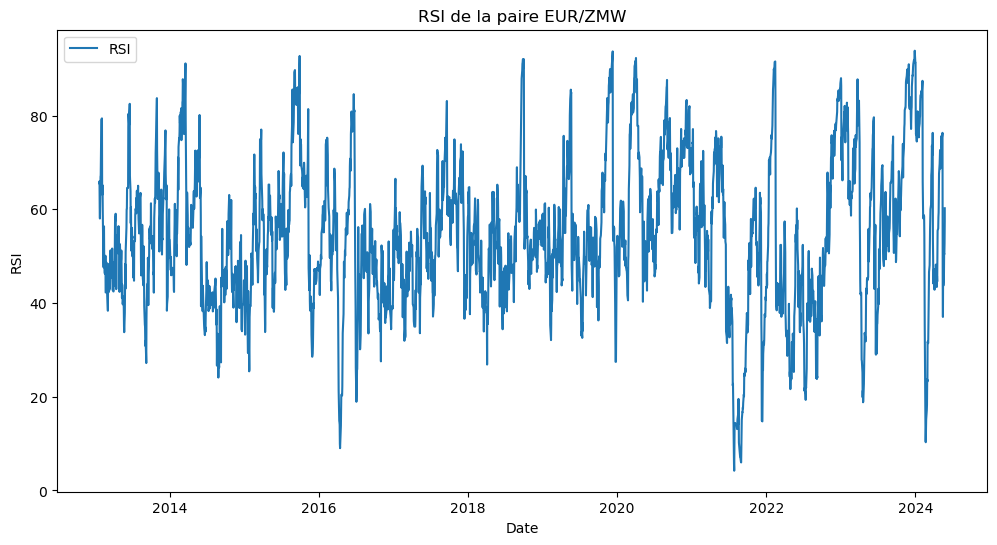

In [19]:
# Visualisation du RSI
plt.figure(figsize=(12, 6))
plt.plot(eurzmw_data['RSI'], label='RSI')
plt.title('RSI de la paire EUR/ZMW')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

Le RSI de la paire EUR/ZMW montre des conditions fréquentes de surachat (RSI > 70) et de survente (RSI < 30), notamment en 2015-2016, 2020-2021, et 2023-2024. Ces périodes coïncident avec des fluctuations marquées identifiées par les bandes de Bollinger et les moyennes mobiles.

Le RSI eourrait permettre à nos modèles  de mieux anticiper les mouvements de marché et d'ajuster les prévisions en fonction des conditions de surachat et de survente, maximisant ainsi la performance prédictive dans des conditions de volatilité faible ou modérée.

## 6. Analyse du MACD (Convergence-Divergence des Moyennes Mobiles)

Le MACD, ou Convergence-Divergence des Moyennes Mobiles, est un indicateur technique clé utilisé pour identifier les changements de momentum et de tendance dans les mouvements de prix. Il se compose de trois éléments : la ligne MACD (différence entre l'EMA à 12 jours et l'EMA à 26 jours), la ligne de signal (EMA à 9 jours de la ligne MACD) et l'histogramme MACD (différence entre la ligne MACD et la ligne de signal)

 Dans notre contexte, il permet d'améliorer la précision de nos prévisions en identifiant les points de retournement de tendance et d'optimiser nos stratégies de trading en fournissant des signaux d'achat et de vente plus fiables pour la paire EUR/ZMW

In [9]:
# Calcul des MACD (Moving Average Convergence Divergence)
eurzmw_data['MACD'] = ta.trend.macd(eurzmw_data['Close'])
eurzmw_data['MACD Signal'] = ta.trend.macd_signal(eurzmw_data['Close'])
eurzmw_data['MACD Hist'] = ta.trend.macd_diff(eurzmw_data['Close'])

In [21]:
# Visualisation du MACD
fig = go.Figure()

# Ajout de la ligne MACD
fig.add_trace(go.Scatter(x=eurzmw_data.index, y=eurzmw_data['MACD'], mode='lines', name='MACD'))

# Ajout de la ligne de signal MACD
fig.add_trace(go.Scatter(x=eurzmw_data.index, y=eurzmw_data['MACD Signal'], mode='lines', name='Signal MACD'))

# Ajout de l'histogramme MACD
fig.add_trace(go.Bar(x=eurzmw_data.index, y=eurzmw_data['MACD Hist'], name='MACD Histogram'))

# Mise à jour des propriétés de la figure
fig.update_layout(
    title='MACD de la paire EUR/ZMW',
    xaxis_title='Date',
    yaxis_title='MACD',
    xaxis=dict(
        rangeslider=dict(visible=True),
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
)

# Affichage de la figure
fig.show()

* **Vue Globale (2005-2024)** : De 2005 à 2020, le MACD présente une tendance relativement stable. Après 2020, nous observons des pics et des creux plus prononcés, indiquant une volatilité accrue sur cette période.

* **Zoom sur 2023-2024** : Les croisements fréquents du MACD et de la ligne de signal en 2023 et début 2024 fournissent des indications claires sur les périodes de hausse et de baisse du marché. Ces croisements sont en corrélation avec les conditions de surachat et de survente indiquées par le RSI et les fluctuations marquées identifiées par les bandes de Bollinger.

* **Histograms MACD** : Les barres d'histogramme MACD montrent l'intensité des mouvements de prix. Des barres positives signalent une tendance haussière, tandis que des barres négatives indiquent une tendance baissière.

Le MACD de la paire EUR/ZMW révèle des changements significatifs dans la volatilité post-2020, avec des pics et creux marqués. Les croisements fréquents du MACD et de la ligne de signal en 2023-2024 indiquent des fluctuations notables, corroborant les conditions de surachat et survente détectées par le RSI et les mouvements capturés par les bandes de Bollinger. Intégrer ces observations dans notre modèle permettrait de mieux saisir les dynamiques de volatilité récente et d'améliorer la précision des prévisions.

## Décomposition des Séries Temporelles

### 1. Series Temporelles

Dans le cadre de notre analyse des taux de change EUR/ZMW, la décomposition des séries temporelles va nous permettre de :

* Identifier la Tendance : En isolant la composante tendance, nous pouvons comprendre la direction générale du marché sur une période donnée, ce qui est essentiel pour les prévisions à long terme.

* Détecter les saisonnalités :
        La composante saisonnière nous aide à identifier les variations périodiques récurrentes, ce qui est crucial pour comprendre les cycles de marché et ajuster nos stratégies de trading en conséquence.

* Analyser les vairations irrégulières (résidus) : La composante résiduelle représente les variations irrégulières non expliquées par la tendance ou la saisonnalité. L'analyse de ces résidus peut nous aider à détecter des anomalies ou des événements spécifiques qui ont impacté les prix.

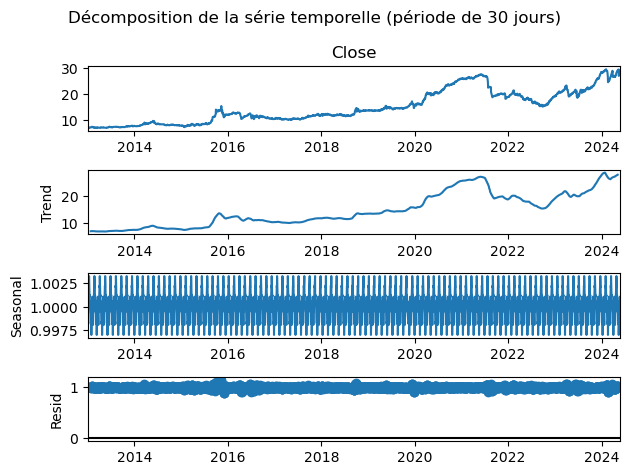

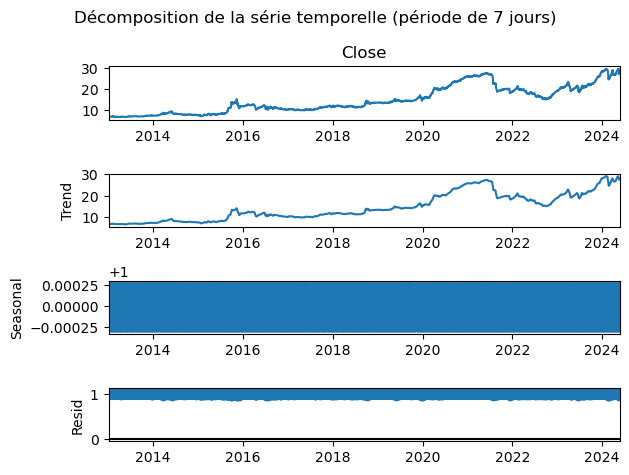

In [22]:
# Décomposition avec période de 30 jours
result_30 = seasonal_decompose(eurzmw_data['Close'], model='multiplicative', period=30)
fig_30 = result_30.plot()
fig_30.suptitle('Décomposition de la série temporelle (période de 30 jours)', y=0.98)  # Ajustement de l'emplacement du titre
plt.tight_layout()
plt.show()

# Décomposition avec période de 7 jours
result_7 = seasonal_decompose(eurzmw_data['Close'], model='multiplicative', period=7)
fig_7 = result_7.plot()
fig_7.suptitle('Décomposition de la série temporelle (période de 7 jours)', y=0.98)  # Ajustement de l'emplacement du titre
plt.tight_layout()
plt.show()

* **Tendance** : La tendance montre une hausse constante des prix de 2014 à 2024, avec des pics significatifs en 2021 et 2023, confirmant les périodes de haute volatilité identifiées par les RSI et MACD.

* **Saisonnalité** : Les fluctuations saisonnières sont faibles pour les périodes de 30 jours et 7 jours, indiquant un impact minimal sur les prix à long terme.

* **Résidus** : Les résidus sont faibles et stables, indiquant que la majorité des variations de prix sont bien capturées par les modèles de tendance et de saisonnalité.

La décomposition de la série temporelle montre une tendance claire et des fluctuations saisonnières minimales pour la paire EUR/ZMW. En combinant ces observations avec les analyses des indicateurs RSI et MACD, nous en deduisons que notre modèle doit se concentrer sur les composantes de tendance pour capturer la dynamique des prix de la paire EUR/ZMW. Les fluctuations saisonnières ayant un impact minimal, il est crucial de se focaliser sur la volatilité à long terme pour améliorer la précision et la robustesse des prévisions.

### 2. Autocorrélation et autocorrélation partielle

L'autocorrélation mesure la corrélation entre les valeurs d'une série temporelle et les valeurs décalées de cette même série. Elle aide à identifier la persistance ou la répétition des motifs dans les données sur différentes périodes de décalage (lags).

* ACF (Autocorrelation Function) : Représente la corrélation entre la série temporelle et ses propres valeurs décalées.
        Un coefficient d'autocorrélation élevé à un certain décalage indique une relation forte entre les valeurs actuelles et les valeurs passées à ce décalage.

L'autocorrélation partielle mesure la corrélation entre les valeurs de la série temporelle à différents décalages, en éliminant l'effet des décalages intermédiaires. Cela aide à identifier les décalages qui ont un effet direct sur la série temporelle, sans l'influence des décalages précédents.

* PACF (Partial Autocorrelation Function) :Montre la corrélation entre la série temporelle et ses valeurs décalées en contrôlant pour les décalages intermédiaires. Elle permet également d'identifier les décalages qui ont une influence directe sur les valeurs actuelles de la série.

L'analyse des fonctions d'autocorrélation et d'autocorrélation partielle peuvent aidet à identifier les modèles ARIMA  appropriés pour les prévisions. Par exemple, des pics significatifs dans l'ACF ou la PACF peuvent indiquer des ordres AR (AutoRegressive) ou MA (Moving Average) potentiels.


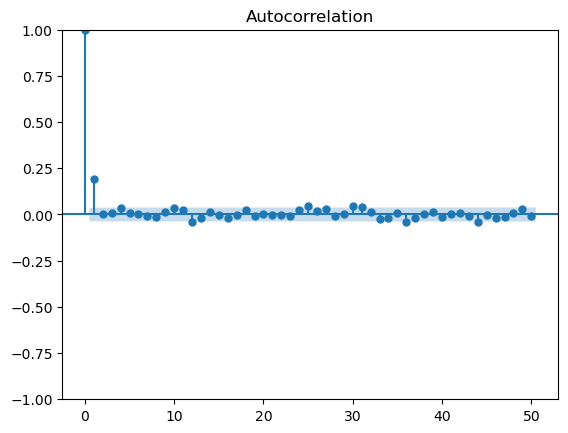

c:\Users\33671\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



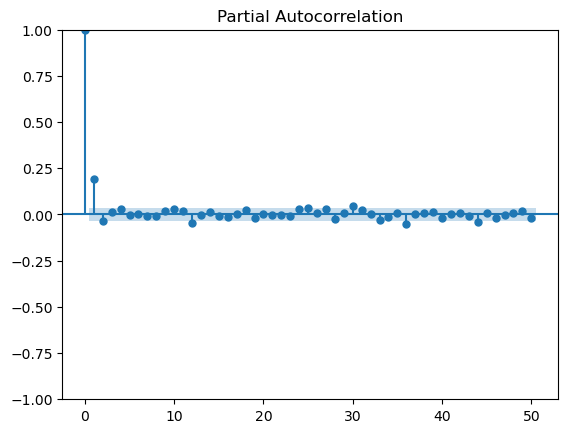

In [23]:
# Autocorrélation des rendements quotidiens
plot_acf(eurzmw_data['Log Returns'].dropna(), lags=50)
plt.show()

# Autocorrélation partielle des rendements quotidiens
plot_pacf(eurzmw_data['Log Returns'].dropna(), lags=50)
plt.show()

la paire EUR/ZMW montrent une faible corrélation significative uniquement au premier lag, ce qui indique une dépendance à court terme limitée dans les rendements. Les autres lags n'affichent pas de corrélation significative, suggérant que les rendements quotidiens sont principalement aléatoires à l'exception du court terme immédiat.

Cette observation corrobore les résultats précédents montrant des fluctuations importantes et des périodes de haute volatilité. un modèle tel GARCH pourrait être appropriés pour capturer cette dynamique à court terme et ARIMA pour des capturer les tendances et les structures temporelles plus étendues.


### 3. Test de Dickey-Fuller augmenté

Dans notre analyse des rendements de la paire EUR/ZMW, le test de Dickey-Fuller augmenté (ADF) est essentiel pour vérifier si les données sont stationnaires. La stationnarité, caractérisée par des propriétés statistiques constantes dans le temps, est cruciale pour appliquer des modèles de séries temporelles comme ARIMA.

Ce test nous aide à déterminer si les données nécessitent des transformations supplémentaires, assurant ainsi la robustesse et la précision de nos prévisions.

In [10]:
# Test de Dickey-Fuller augmenté
result = adfuller(eurzmw_data['Close'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -0.07905063914216583
p-value: 0.9514856046210503


L'ADF (Augmented Dickey-Fuller) Statistic de -0.079 indique que la série des prix de clôture de la paire EUR/ZMW est non stationnaire, car la valeur est très proche de zéro. De plus, le p-value de 0.9514, bien supérieur au seuil de 0.05, signifie que nous ne pouvons pas rejeter l'hypothèse nulle de la présence d'une racine unitaire.

Pour notre modèle, la non-stationnarité de la série des prix de clôture implique que nous devrions envisager des transformations pour stationnariser les données, telles que la différenciation. Les modèles comme ARIMA, qui incluent une composante intégrée pour gérer la non-stationnarité, sont adaptés pour des prévisions à long terme.

Combiné avec des modèles GARCH pour la capture de la volatilité à court terme et des indicateurs techniques pour le timing des décisions, nous pouvons élaborer une stratégie robuste pour la gestion de portefeuille dans un contexte de marché volatil.

# Entrainement des modeles.

## Modele Random Forest

### Preprocessing

In [11]:
# Permet de réinitialiser le df pour les entrainements avec les transformation réalisés lors de l'EDA (datetime)
df_model = eurzmw_data

In [12]:
# Ajouter RSI et MACD
eurzmw_data['RSI'] = ta.momentum.rsi(eurzmw_data['Close'], window=14)
eurzmw_data['MACD'] = ta.trend.macd(eurzmw_data['Close'])
eurzmw_data['MACD Signal'] = ta.trend.macd_signal(eurzmw_data['Close'])
eurzmw_data['MACD Hist'] = ta.trend.macd_diff(eurzmw_data['Close'])
eurzmw_data['7D MA'] = eurzmw_data['Close'].rolling(window=7).mean()
eurzmw_data['30D MA'] = eurzmw_data['Close'].rolling(window=30).mean()
eurzmw_data['Bollinger High'] = ta.volatility.bollinger_hband(eurzmw_data['Close'], window=20)
eurzmw_data['Bollinger Low'] = ta.volatility.bollinger_lband(eurzmw_data['Close'], window=20)
eurzmw_data['ATR'] = ta.volatility.average_true_range(eurzmw_data['High'], eurzmw_data['Low'], eurzmw_data['Close'], window=14)
eurzmw_data['Log Returns'] = np.log(eurzmw_data['Close'] / eurzmw_data['Close'].shift(1))

In [13]:
# Décomposition de la série temporelle (période de 30 jours)
decomposition = seasonal_decompose(eurzmw_data['Close'], model='multiplicative', period=30)
eurzmw_data['Trend'] = decomposition.trend
eurzmw_data['Seasonal'] = decomposition.seasonal
eurzmw_data['Resid'] = decomposition.resid

In [14]:
# Extraction des caractéristiques temporelles depuis l'index
eurzmw_data['Day'] = eurzmw_data.index.day
eurzmw_data['Month'] = eurzmw_data.index.month
eurzmw_data['Year'] = eurzmw_data.index.year

In [15]:
# Ajouter des décalages temporels comme caractéristiques
eurzmw_data['Lag1'] = eurzmw_data['Close'].shift(1)
eurzmw_data['Lag2'] = eurzmw_data['Close'].shift(2)


In [16]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurzmw_data.dropna(inplace=True)

In [17]:
# Normalisation des données
scaler = StandardScaler()
scaled_features = scaler.fit_transform(eurzmw_data[['RSI', 'MACD', 'MACD Signal', 'MACD Hist', '7D MA', '30D MA', 'Bollinger High', 'Bollinger Low', 'ATR', 'Log Returns', 'Lag1', 'Lag2', 'Day', 'Month', 'Year', 'Trend', 'Seasonal', 'Resid']])
scaled_features = pd.DataFrame(scaled_features, index=eurzmw_data.index, columns=['RSI', 'MACD', 'MACD Signal', 'MACD Hist', '7D MA', '30D MA', 'Bollinger High', 'Bollinger Low', 'ATR', 'Log Returns', 'Lag1', 'Lag2', 'Day', 'Month', 'Year', 'Trend', 'Seasonal', 'Resid'])

In [18]:
# Features and Target
X = scaled_features
y = eurzmw_data['Close']

In [19]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


### Training

In [31]:
# Validation croisée avec TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X_train):
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Modèle Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_fold, y_train_fold)

    # Prédictions
    y_valid_pred = rf_model.predict(X_valid_fold)

    # Evaluation du modèle
    mse_forest = mean_squared_error(y_valid_fold, y_valid_pred)
    mae_forest = mean_absolute_error(y_valid_fold, y_valid_pred)
    rmse_forest = np.sqrt(mse_forest)
    r2_forest = r2_score(y_valid_fold, y_valid_pred)

    print(f'Mean Squared Error: {mse_forest}')
    print(f'Mean Absolute Error: {mae_forest}')
    print(f'Root Mean Squared Error: {rmse_forest}')
    print(f'R-squared: {r2_forest}')


Mean Squared Error: 3.492430736418668
Mean Absolute Error: 1.0708761773778928
Root Mean Squared Error: 1.8688046276747787
R-squared: 0.2160030698130485
Mean Squared Error: 0.2473086910471131
Mean Absolute Error: 0.42639613110539887
Root Mean Squared Error: 0.4973014086518488
R-squared: 0.566535194116888
Mean Squared Error: 0.017710816750200142
Mean Absolute Error: 0.10425866323907368
Root Mean Squared Error: 0.13308199258427167
R-squared: 0.9784278483583694
Mean Squared Error: 12.270208763966117
Mean Absolute Error: 2.428361416452439
Root Mean Squared Error: 3.5028857766084975
R-squared: -0.8445886985076196
Mean Squared Error: 11.916148827917352
Mean Absolute Error: 2.7269455892545005
Root Mean Squared Error: 3.4519775242485795
R-squared: -0.31021506126847886


### Gridsearch

In [32]:
# Optimisation des hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=tscv,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [33]:
# Meilleurs hyperparamètres
best_rf_model = grid_search.best_estimator_


In [34]:
# Prédictions finales
y_pred = best_rf_model.predict(X_test)

In [35]:
# Évaluation du modèle
mse_forest_grid = mean_squared_error(y_test, y_pred)
mae_forest_grid = mean_absolute_error(y_test, y_pred)
rmse_forest_grid = np.sqrt(mse_forest_grid)
r2_forest_grid = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_forest_grid}')
print(f'Mean Absolute Error: {mae_forest_grid}')
print(f'Root Mean Squared Error: {rmse_forest_grid}')
print(f'R-squared: {r2_forest_grid}')

Mean Squared Error: 0.23233822064689783
Mean Absolute Error: 0.2973169195321045
Root Mean Squared Error: 0.4820147514826676
R-squared: 0.9844762795411636


In [36]:
# Importance des caractéristiques
importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

           Feature  Importance
10            Lag1    0.803210
15           Trend    0.113005
5           30D MA    0.061597
4            7D MA    0.011032
11            Lag2    0.010230
7    Bollinger Low    0.000258
9      Log Returns    0.000167
6   Bollinger High    0.000148
13           Month    0.000125
0              RSI    0.000071
3        MACD Hist    0.000048
17           Resid    0.000031
1             MACD    0.000028
2      MACD Signal    0.000016
12             Day    0.000011
8              ATR    0.000011
16        Seasonal    0.000010
14            Year    0.000003


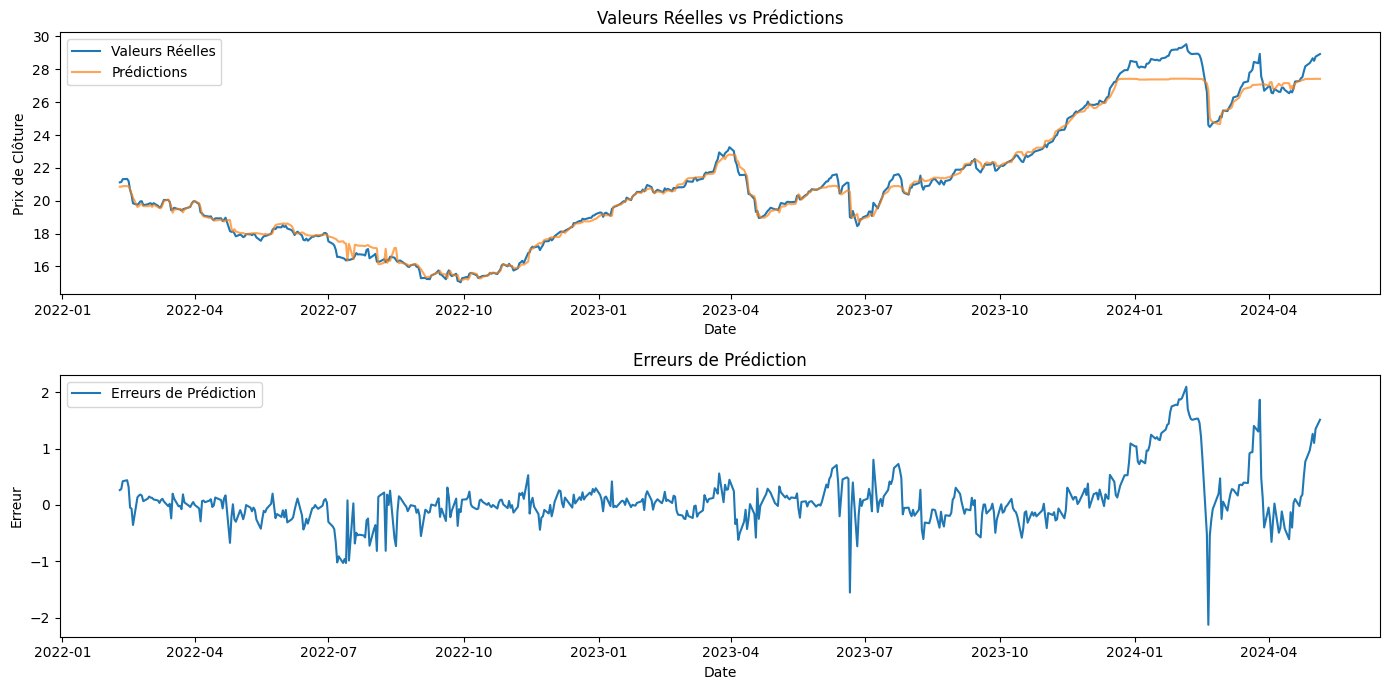

In [37]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, y_pred, label='Prédictions', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - y_pred, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

## Modele Gxboost

### Training

In [38]:
# Modèle XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [39]:
# Prédictions
y_pred = xgb_model.predict(X_test)

In [40]:
# Évaluation du modèle
mse_xgb = mean_squared_error(y_test, y_pred)
mae_xgb = mean_absolute_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_xgb}')
print(f'Mean Absolute Error: {mae_xgb}')
print(f'Root Mean Squared Error: {rmse_xgb}')
print(f'R-squared: {r2_xgb}')

Mean Squared Error: 0.23317645047252247
Mean Absolute Error: 0.2842010827360806
Root Mean Squared Error: 0.48288347504602236
R-squared: 0.9844202730629482


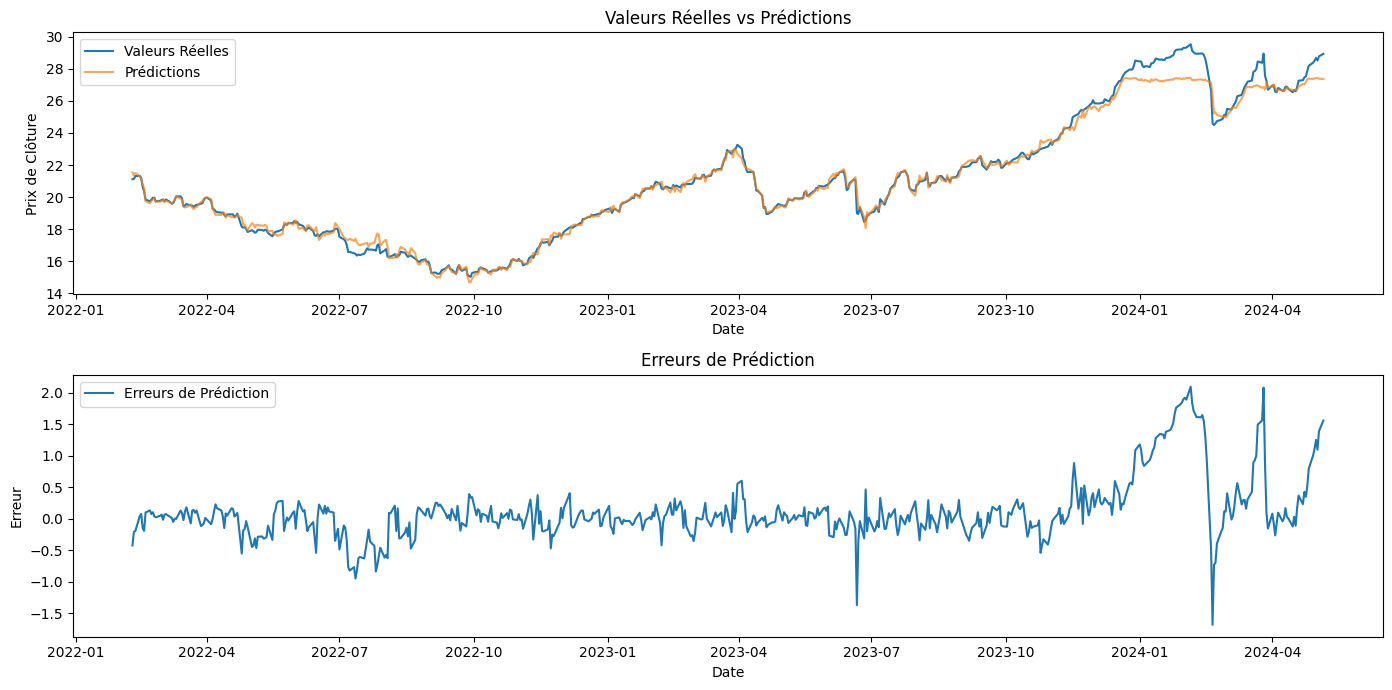

In [41]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, y_pred, label='Prédictions', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - y_pred, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

### Gridsearch

In [42]:
# Optimisation des hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                           param_grid=param_grid,
                           cv=TimeSeriesSplit(n_splits=5),
                           scoring='neg_mean_squared_error', # Minimise les erreurs
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [43]:
# Meilleurs hyperparamètres
best_xgb_model = grid_search.best_estimator_

In [44]:
# Prédictions finales
y_pred = best_xgb_model.predict(X_test)

In [45]:
# Évaluation du modèle
mse_xgb_grid = mean_squared_error(y_test, y_pred)
mae_xgb_grid = mean_absolute_error(y_test, y_pred)
rmse_xgb_grid = np.sqrt(mse_xgb_grid)
r2_xgb_grid = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_xgb_grid}')
print(f'Mean Absolute Error: {mae_xgb_grid}')
print(f'Root Mean Squared Error: {rmse_xgb_grid}')
print(f'R-squared: {r2_xgb_grid}')


Mean Squared Error: 0.2718672975112272
Mean Absolute Error: 0.308681295676976
Root Mean Squared Error: 0.5214089541916471
R-squared: 0.9818351370828579


In [46]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

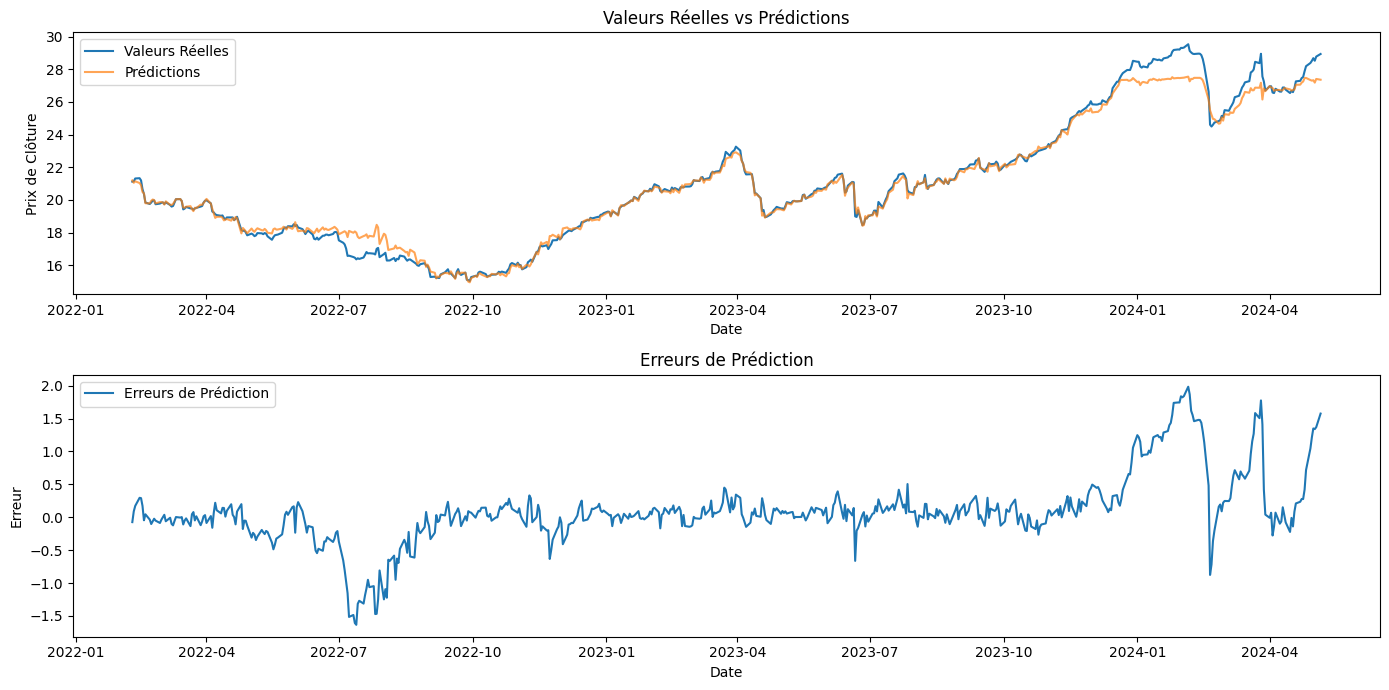

In [47]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, y_pred, label='Prédictions', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - y_pred, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

## Modele LSTM

### Preprocessing

In [20]:
# Charger les données
eurzmw_data = df_model

In [21]:
# Ajouter RSI, MACD, Bollinger Bands, ATR et Log Returns
eurzmw_data['RSI'] = ta.momentum.rsi(eurzmw_data['Close'], window=14)
eurzmw_data['MACD'] = ta.trend.macd(eurzmw_data['Close'])
eurzmw_data['MACD Signal'] = ta.trend.macd_signal(eurzmw_data['Close'])
eurzmw_data['MACD Hist'] = ta.trend.macd_diff(eurzmw_data['Close'])
eurzmw_data['7D MA'] = eurzmw_data['Close'].rolling(window=7).mean()
eurzmw_data['30D MA'] = eurzmw_data['Close'].rolling(window=30).mean()
eurzmw_data['Bollinger High'] = ta.volatility.bollinger_hband(eurzmw_data['Close'], window=20)
eurzmw_data['Bollinger Low'] = ta.volatility.bollinger_lband(eurzmw_data['Close'], window=20)
eurzmw_data['ATR'] = ta.volatility.average_true_range(eurzmw_data['High'], eurzmw_data['Low'], eurzmw_data['Close'], window=14)
eurzmw_data['Log Returns'] = np.log(eurzmw_data['Close'] / eurzmw_data['Close'].shift(1))

In [22]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurzmw_data.dropna(inplace=True)

In [23]:
# Décomposition de la série temporelle (période de 30 jours)
decomposition = seasonal_decompose(eurzmw_data['Close'], model='multiplicative', period=30)
eurzmw_data['Trend'] = decomposition.trend
eurzmw_data['Seasonal'] = decomposition.seasonal
eurzmw_data['Resid'] = decomposition.resid

# Extraction des caractéristiques temporelles depuis l'index
eurzmw_data['Day'] = eurzmw_data.index.day
eurzmw_data['Month'] = eurzmw_data.index.month
eurzmw_data['Year'] = eurzmw_data.index.year

# Ajouter des décalages temporels comme caractéristiques
eurzmw_data['Lag1'] = eurzmw_data['Close'].shift(1)
eurzmw_data['Lag2'] = eurzmw_data['Close'].shift(2)

In [24]:
# Normalisation des données
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(eurzmw_data[['Close', 'RSI', 'MACD', 'MACD Signal', 'MACD Hist', 'Lag1', 'Lag2', '7D MA', '30D MA','Bollinger High', 'Bollinger Low','ATR','Log Returns' ]])


In [25]:
# Division en train et test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [26]:
# Création des séquences de données pour LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step)])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60  # Ajustement du time_step
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [27]:
# Reshape des données pour LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

### Training

In [28]:
# Modèle LSTM
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dense(1))

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
71/71 [==============================] - 5s 54ms/step - loss: nan - val_loss: nan
Epoch 2/20
71/71 [==============================] - 4s 51ms/step - loss: nan - val_loss: nan
Epoch 3/20
71/71 [==============================] - 4s 53ms/step - loss: nan - val_loss: nan
Epoch 4/20
71/71 [==============================] - 4s 52ms/step - loss: nan - val_loss: nan
Epoch 5/20
71/71 [==============================] - 4s 52ms/step - loss: nan - val_loss: nan
Epoch 6/20
71/71 [==============================] - 4s 52ms/step - loss: nan - val_loss: nan
Epoch 7/20
71/71 [==============================] - 3s 49ms/step - loss: nan - val_loss: nan
Epoch 8/20
71/71 [==============================] - 4s 52ms/step - loss: nan - val_loss: nan
Epoch 9/20
71/71 [==============================] - 4s 51ms/step - loss: nan - val_loss: nan
Epoch 10/20
71/71 [==============================] - 4s 52ms/step - loss: nan - val_loss: nan
Epoch 11/20
71/71 [==============================] - 4s 51ms/step - l

In [30]:
model.save('eurzmw_lstm_model.h5')

/Users/omarmorsli/miniconda3/envs/lstmapi3/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [59]:
# Prédictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 0s 29ms/step


In [60]:
# Inverser la normalisation pour obtenir les valeurs réelles
train_predict_extended = np.zeros((train_predict.shape[0], scaled_data.shape[1]))
test_predict_extended = np.zeros((test_predict.shape[0], scaled_data.shape[1]))

train_predict_extended[:, 0] = train_predict[:, 0]
test_predict_extended[:, 0] = test_predict[:, 0]

train_predict = scaler.inverse_transform(train_predict_extended)[:, 0]
test_predict = scaler.inverse_transform(test_predict_extended)[:, 0]

In [61]:
# Inverser la normalisation pour y_train et y_test
y_train_extended = np.zeros((y_train.shape[0], scaled_data.shape[1]))
y_test_extended = np.zeros((y_test.shape[0], scaled_data.shape[1]))

y_train_extended[:, 0] = y_train
y_test_extended[:, 0] = y_test

y_train = scaler.inverse_transform(y_train_extended)[:, 0]
y_test = scaler.inverse_transform(y_test_extended)[:, 0]

In [62]:
# Vérifier les valeurs NaN
print(f'y_test NaN values: {np.isnan(y_test).sum()}')
print(f'test_predict NaN values: {np.isnan(test_predict).sum()}')

y_test NaN values: 0
test_predict NaN values: 0


In [63]:
# Évaluation du modèle
mse_lstm = mean_squared_error(y_test, test_predict)
mae_lstm = mean_absolute_error(y_test, test_predict)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, test_predict)

print(f'Mean Squared Error: {mse_lstm}')
print(f'Mean Absolute Error: {mae_lstm}')
print(f'Root Mean Squared Error: {rmse_lstm}')
print(f'R-squared: {r2_lstm}')

Mean Squared Error: 0.29144899407862634
Mean Absolute Error: 0.37961989697713394
Root Mean Squared Error: 0.5398601615961548
R-squared: 0.9810402343495039


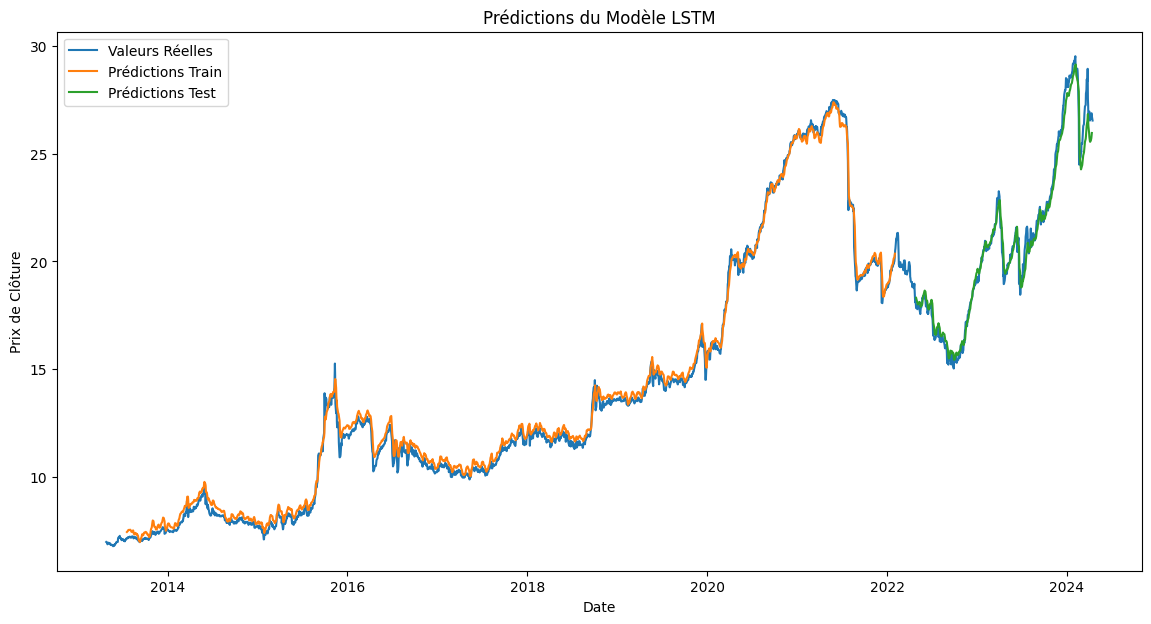

In [64]:
# Visualisation des résultats
plt.figure(figsize=(14, 7))
plt.plot(eurzmw_data.index, eurzmw_data['Close'], label='Valeurs Réelles')
plt.plot(eurzmw_data.index[time_step:len(train_predict) + time_step], train_predict, label='Prédictions Train')
plt.plot(eurzmw_data.index[len(train_predict) + (2 * time_step) + 1:len(train_predict) + (2 * time_step) + 1 + len(test_predict)], test_predict, label='Prédictions Test')
plt.title('Prédictions du Modèle LSTM')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()
plt.show()

## Modele Prophet

### Preprocessing

In [65]:
# Charger les données
eurzmw_data = df_model

In [66]:
# Ajouter RSI, MACD, Bollinger Bands, ATR et Log Returns
eurzmw_data['RSI'] = ta.momentum.rsi(eurzmw_data['Close'], window=14)
eurzmw_data['MACD'] = ta.trend.macd(eurzmw_data['Close'])
eurzmw_data['MACD Signal'] = ta.trend.macd_signal(eurzmw_data['Close'])
eurzmw_data['MACD Hist'] = ta.trend.macd_diff(eurzmw_data['Close'])
eurzmw_data['7D MA'] = eurzmw_data['Close'].rolling(window=7).mean()
eurzmw_data['30D MA'] = eurzmw_data['Close'].rolling(window=30).mean()
eurzmw_data['Bollinger High'] = ta.volatility.bollinger_hband(eurzmw_data['Close'], window=20)
eurzmw_data['Bollinger Low'] = ta.volatility.bollinger_lband(eurzmw_data['Close'], window=20)
eurzmw_data['ATR'] = ta.volatility.average_true_range(eurzmw_data['High'], eurzmw_data['Low'], eurzmw_data['Close'], window=14)
eurzmw_data['Log Returns'] = np.log(eurzmw_data['Close'] / eurzmw_data['Close'].shift(1))

In [67]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurzmw_data.dropna(inplace=True)

In [68]:
# Préparation des données pour Prophet
df = eurzmw_data.reset_index()[['Date', 'Close']]
df.columns = ['ds', 'y']

In [69]:
# Ajout de variables explicatives basées sur notre EDA
df['day'] = df['ds'].dt.day
df['month'] = df['ds'].dt.month
df['year'] = df['ds'].dt.year
df['7d_ma'] = eurzmw_data['7D MA'].values
df['30d_ma'] = eurzmw_data['30D MA'].values
df['rsi'] = eurzmw_data['RSI'].values
df['macd'] = eurzmw_data['MACD'].values
df['macd_signal'] = eurzmw_data['MACD Signal'].values
df['bollinger_high'] = eurzmw_data['Bollinger High'].values
df['bollinger_low'] = eurzmw_data['Bollinger Low'].values
df['atr'] = eurzmw_data['ATR'].values
df['log_returns'] = eurzmw_data['Log Returns'].values

### Training

In [70]:
# Ajustement du modèle Prophet avec les régressors
model = Prophet(daily_seasonality=True)
model.add_regressor('day')
model.add_regressor('month')
model.add_regressor('year')
model.add_regressor('7d_ma')
model.add_regressor('30d_ma')
model.add_regressor('rsi')
model.add_regressor('macd')
model.add_regressor('macd_signal')
model.add_regressor('bollinger_high')
model.add_regressor('bollinger_low')
model.add_regressor('atr')
model.add_regressor('log_returns')
model.fit(df)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp2dlp088s/c5iu6jfr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2dlp088s/s8dln7en.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89446', 'data', 'file=/tmp/tmp2dlp088s/c5iu6jfr.json', 'init=/tmp/tmp2dlp088s/s8dln7en.json', 'output', 'file=/tmp/tmp2dlp088s/prophet_modelqpcm0ame/prophet_model-20240528152440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:24:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:24:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [71]:
# Prédictions
future = model.make_future_dataframe(periods=30)
future['day'] = future['ds'].dt.day
future['month'] = future['ds'].dt.month
future['year'] = future['ds'].dt.year

In [72]:
# Utilisation des dernières valeurs connues pour les régressors dans les futures dates
last_7d_ma = df['7d_ma'].iloc[-1]
last_30d_ma = df['30d_ma'].iloc[-1]
last_rsi = df['rsi'].iloc[-1]
last_macd = df['macd'].iloc[-1]
last_macd_signal = df['macd_signal'].iloc[-1]
last_bollinger_high = df['bollinger_high'].iloc[-1]
last_bollinger_low = df['bollinger_low'].iloc[-1]
last_atr = df['atr'].iloc[-1]
last_log_returns = df['log_returns'].iloc[-1]

future['7d_ma'] = last_7d_ma
future['30d_ma'] = last_30d_ma
future['rsi'] = last_rsi
future['macd'] = last_macd
future['macd_signal'] = last_macd_signal
future['bollinger_high'] = last_bollinger_high
future['bollinger_low'] = last_bollinger_low
future['atr'] = last_atr
future['log_returns'] = last_log_returns

forecast = model.predict(future)

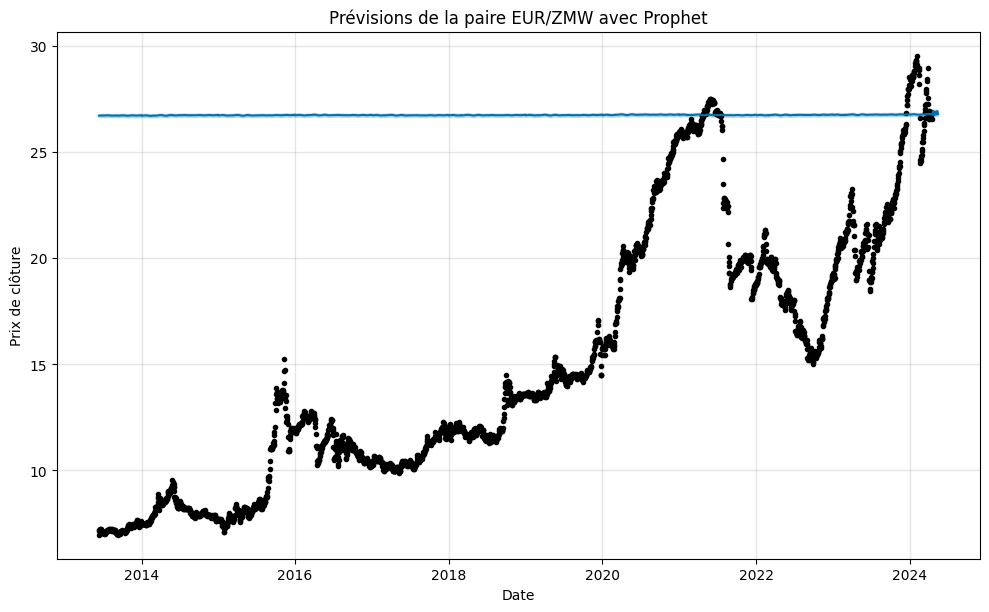

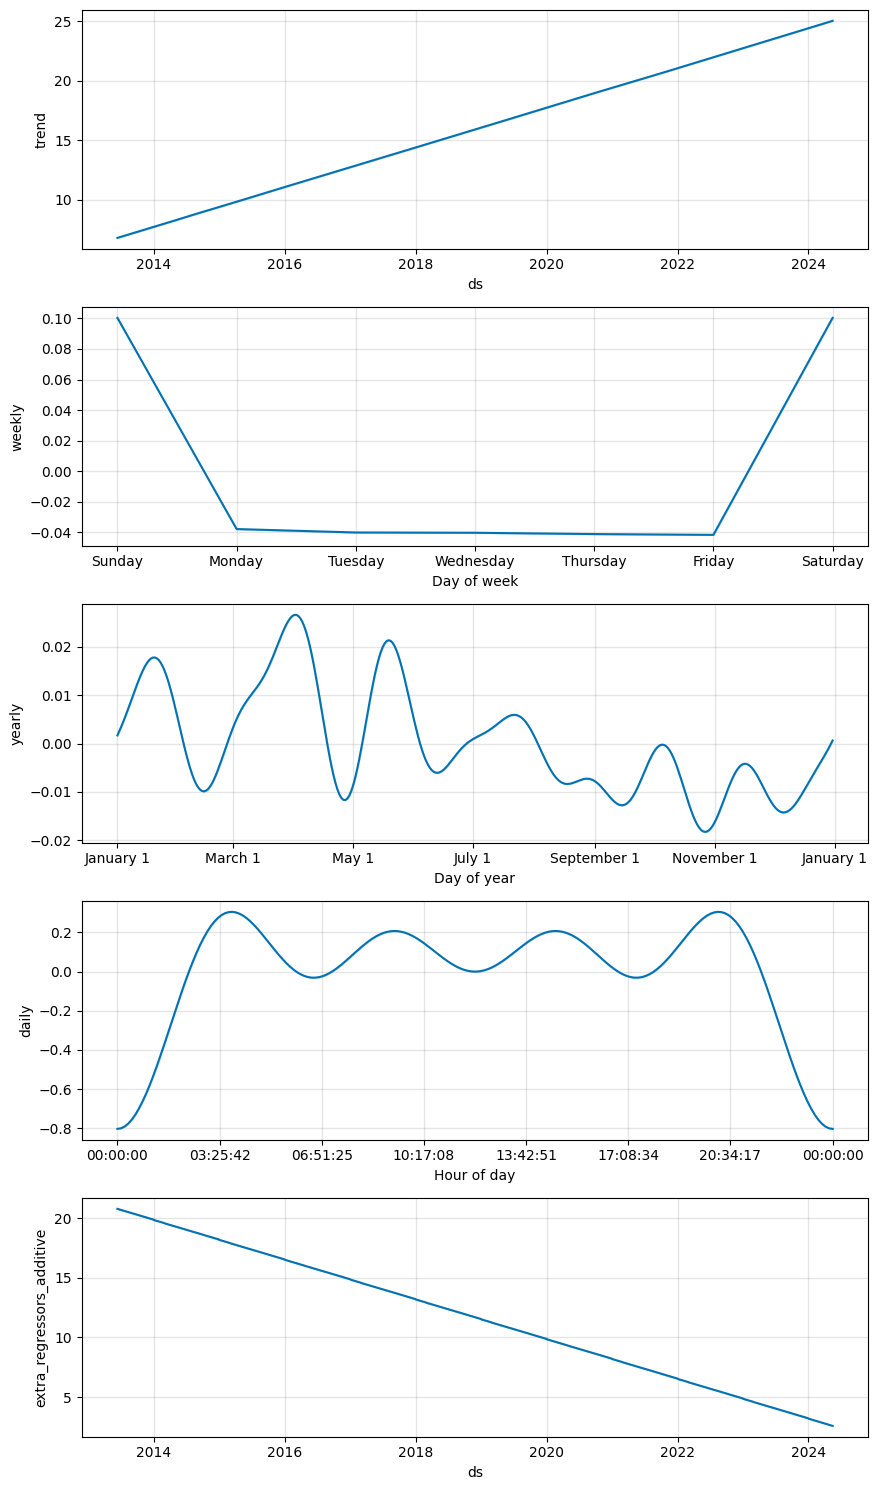

In [73]:
# Visualisation des prévisions
fig = model.plot(forecast)
plt.title('Prévisions de la paire EUR/ZMW avec Prophet')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.show()

# Visualisation des composants des prévisions
fig2 = model.plot_components(forecast)
plt.show()

In [74]:
# Évaluation des performances du modèle
actual = df['y'].values[-30:]
predicted = forecast['yhat'].values[-30:]
mse_prophet = mean_squared_error(actual, predicted)
mae_prophet = mean_absolute_error(actual, predicted)
rmse_prophet = np.sqrt(mse_prophet)
r2_prophet = r2_score(actual, predicted)

print(f'Mean Squared Error: {mse_prophet}')
print(f'Mean Absolute Error: {mae_prophet}')
print(f'Root Mean Squared Error: {rmse_prophet}')
print(f'R-squared: {r2_prophet}')

Mean Squared Error: 0.6174894771754904
Mean Absolute Error: 0.5693866609678853
Root Mean Squared Error: 0.7858049867336618
R-squared: -0.08561019358812749


# Modele ARIMA

### Preprocessing

In [75]:
# Charger les données
eurzmw_data = df_model

In [76]:
# Ajouter RSI, MACD, Bollinger Bands, ATR et Log Returns
eurzmw_data['RSI'] = ta.momentum.rsi(eurzmw_data['Close'], window=14)
eurzmw_data['MACD'] = ta.trend.macd(eurzmw_data['Close'])
eurzmw_data['MACD Signal'] = ta.trend.macd_signal(eurzmw_data['Close'])
eurzmw_data['MACD Hist'] = ta.trend.macd_diff(eurzmw_data['Close'])
eurzmw_data['7D MA'] = eurzmw_data['Close'].rolling(window=7).mean()
eurzmw_data['30D MA'] = eurzmw_data['Close'].rolling(window=30).mean()
eurzmw_data['Bollinger High'] = ta.volatility.bollinger_hband(eurzmw_data['Close'], window=20)
eurzmw_data['Bollinger Low'] = ta.volatility.bollinger_lband(eurzmw_data['Close'], window=20)
eurzmw_data['ATR'] = ta.volatility.average_true_range(eurzmw_data['High'], eurzmw_data['Low'], eurzmw_data['Close'], window=14)
eurzmw_data['Log Returns'] = np.log(eurzmw_data['Close'] / eurzmw_data['Close'].shift(1))

In [77]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurzmw_data.dropna(inplace=True)

In [78]:
# Vérification de la stationnarité et transformation des données
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] > 0.05:
        print("La série n'est pas stationnaire")
    else:
        print("La série est stationnaire")

In [79]:
# Vérification initiale
check_stationarity(eurzmw_data['Close'])

# Suppression des doublons dans l'index
eurzmw_data = eurzmw_data[~eurzmw_data.index.duplicated(keep='first')]

# Réindexer les données pour assurer une fréquence quotidienne
eurzmw_data = eurzmw_data.asfreq('D', method='pad')

ADF Statistic: -0.5010583976854012
p-value: 0.8918097918119685
La série n'est pas stationnaire


In [80]:
# Différenciation des données pour rendre la série stationnaire
eurzmw_data['Close_diff'] = eurzmw_data['Close'].diff()

# Suppression des valeurs manquantes après différenciation
eurzmw_data.dropna(inplace=True)

# Vérification de la stationnarité après différenciation
check_stationarity(eurzmw_data['Close_diff'])

ADF Statistic: -20.794351701183654
p-value: 0.0
La série est stationnaire


In [81]:
# Séparation des données en train et test
train_size = int(len(eurzmw_data) * 0.8)
train_data = eurzmw_data[:train_size]
test_data = eurzmw_data[train_size:]

#### Training

In [82]:
# Ajustement du modèle ARIMA sur les données d'entraînement
model = ARIMA(train_data['Close_diff'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 3130
Model:                 ARIMA(5, 1, 0)   Log Likelihood                1877.621
Date:                Tue, 28 May 2024   AIC                          -3743.242
Time:                        15:24:47   BIC                          -3706.951
Sample:                    07-30-2013   HQIC                         -3730.216
                         - 02-22-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6348      0.007    -89.425      0.000      -0.649      -0.621
ar.L2         -0.5648      0.010    -57.986      0.000      -0.584      -0.546
ar.L3         -0.4105      0.009    -47.312      0.0

In [83]:
# Prédictions pour les 30 prochains jours
forecast_diff = model_fit.forecast(steps=30)
forecast = eurzmw_data['Close'].iloc[train_size - 1] + forecast_diff.cumsum()

In [84]:
# Inverser la différenciation pour obtenir les valeurs réelles prévues
forecast_dates = pd.date_range(start=eurzmw_data.index[-1], periods=30, freq='D')
forecast_series = pd.Series(forecast.values, index=forecast_dates)

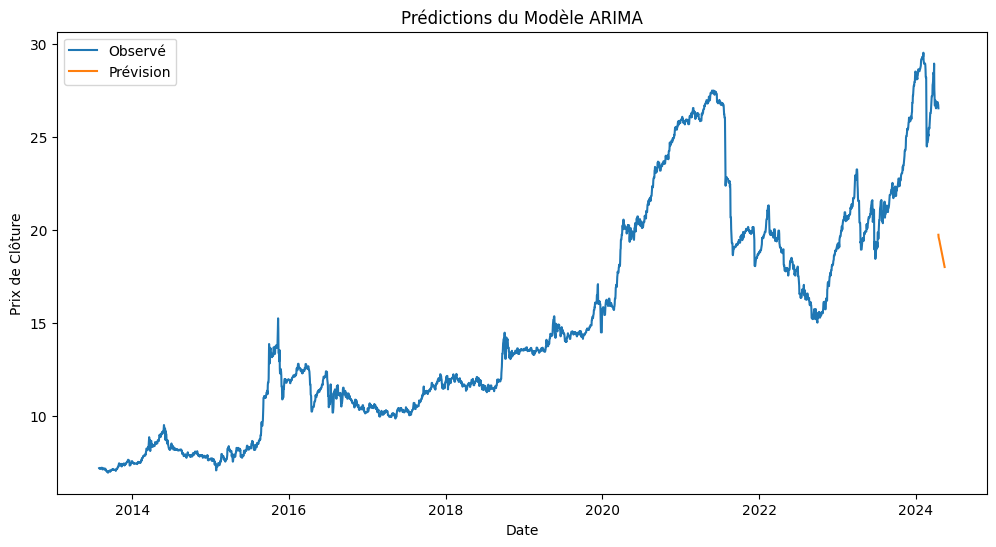

In [85]:
# Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.plot(eurzmw_data.index, eurzmw_data['Close'], label='Observé')
plt.plot(forecast_series.index, forecast_series, label='Prévision')
plt.legend()
plt.title('Prédictions du Modèle ARIMA')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.show()

In [86]:
# Évaluation du modèle sur les données de test
train_size = int(len(eurzmw_data) * 0.8)
train_data, test_data = eurzmw_data['Close_diff'][:train_size], eurzmw_data['Close_diff'][train_size:]


# Ajustement du modèle sur les données d'entraînement
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()
predictions_diff = model_fit.forecast(steps=len(test_data))
predictions = eurzmw_data['Close'].iloc[train_size - 1] + predictions_diff.cumsum()

In [87]:
# Correspondance des index pour y_test et predictions
y_test = eurzmw_data['Close'].iloc[train_size:train_size + len(predictions)]

In [88]:
# Évaluation des performances
mse_arima = mean_squared_error(y_test, predictions)
mae_arima = mean_absolute_error(y_test, predictions)
rmse_arima = np.sqrt(mse_arima)
r2_arima = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse_arima}')
print(f'Mean Absolute Error: {mae_arima}')
print(f'Root Mean Squared Error: {rmse_arima}')
print(f'R-squared: {r2_arima}')

Mean Squared Error: 834.8113753975347
Mean Absolute Error: 23.787973474991624
Root Mean Squared Error: 28.893102557488263
R-squared: -57.042347631870065


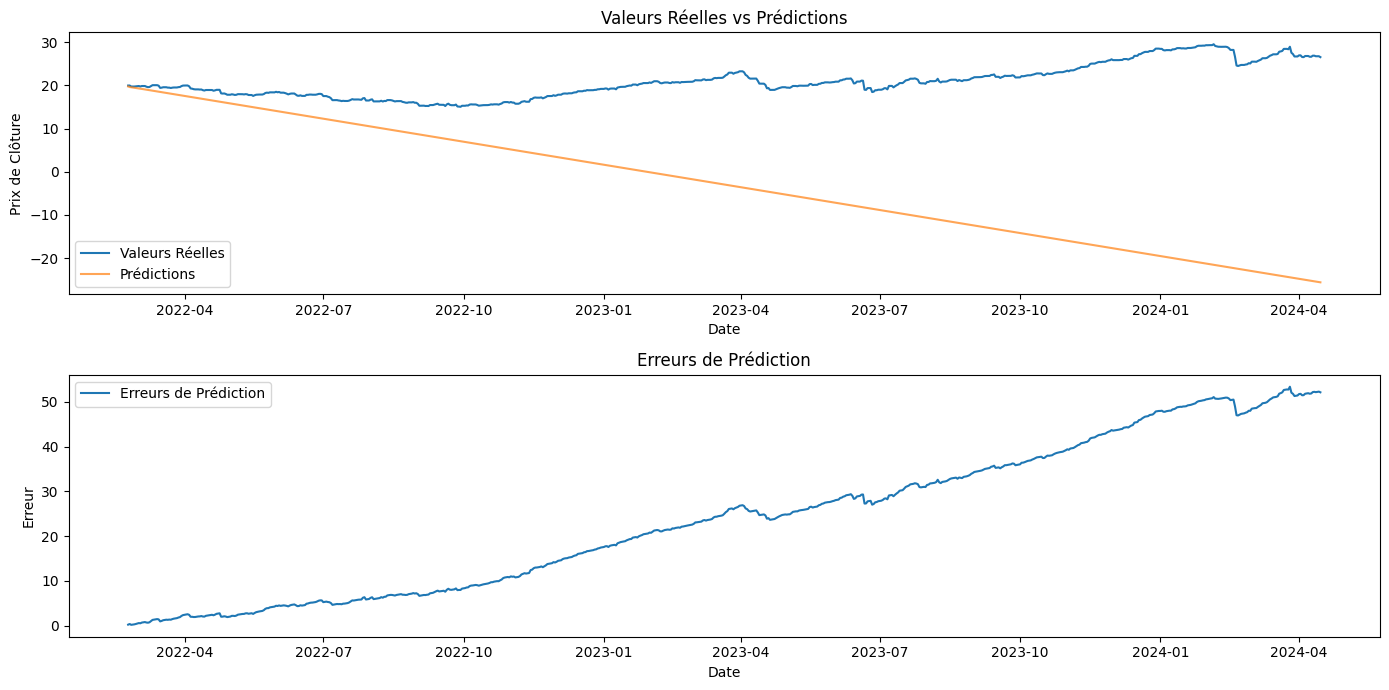

In [89]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, predictions, label='Prédictions', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - predictions, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

## Modele SARIMA

#### Training

In [90]:
# Ajustement du modèle SARIMA
model = SARIMAX(eurzmw_data['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 3913
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                1948.543
Date:                            Tue, 28 May 2024   AIC                          -3887.087
Time:                                    15:25:28   BIC                          -3855.743
Sample:                                07-30-2013   HQIC                         -3875.962
                                     - 04-15-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0118      0.042      0.280      0.780      -0.071       0.094
ma.L1          0.1964      0.043   

In [91]:
# Prédictions pour les 30 prochains jours
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=eurzmw_data.index[-1], periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Vérification des valeurs de prévision
print(forecast_series.head(10))

2024-04-15          NaN
2024-04-16    26.506975
2024-04-17    26.504011
2024-04-18    26.502541
2024-04-19    26.515711
2024-04-20    26.512899
2024-04-21    26.517127
2024-04-22    26.526637
2024-04-23    26.540676
2024-04-24    26.544430
Freq: D, Name: predicted_mean, dtype: float64


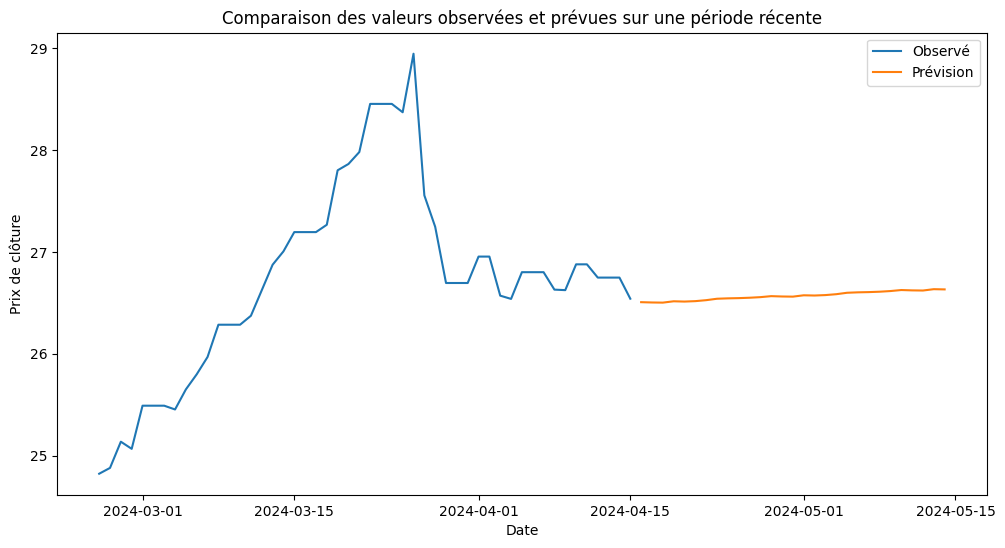

In [92]:
# Comparaison des valeurs observées et prévues sur une période récente
recent_data = eurzmw_data['Close'].tail(50)
recent_forecast = forecast_series.head(50)

plt.figure(figsize=(12, 6))
plt.plot(recent_data, label='Observé')
plt.plot(recent_forecast, label='Prévision')
plt.title('Comparaison des valeurs observées et prévues sur une période récente')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.show()

In [93]:
# Évaluation du modèle sur les données de test
train_size = int(len(eurzmw_data) * 0.8)
train_data, test_data = eurzmw_data['Close'][:train_size], eurzmw_data['Close'][train_size:]


In [94]:
# Ajustement du modèle SARIMA sur les données d'entraînement
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

In [95]:
# Prédictions sur les données de test
predictions = model_fit.predict(start=len(train_data), end=len(eurzmw_data) - 1, dynamic=False)

In [96]:
# Correspondance des index pour y_test et predictions
y_test = eurzmw_data['Close'][train_size:]

In [97]:
# Évaluation des performances
mse_sarima = mean_squared_error(y_test, predictions)
mae_sarima = mean_absolute_error(y_test, predictions)
rmse_sarima = np.sqrt(mse_sarima)
r2_sarima = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse_sarima}')
print(f'Mean Absolute Error: {mae_sarima}')
print(f'Root Mean Squared Error: {rmse_sarima}')
print(f'R-squared: {r2_sarima}')

Mean Squared Error: 9.862070444227882
Mean Absolute Error: 2.511153762635614
Root Mean Squared Error: 3.1403933582001926
R-squared: 0.3143149003913821


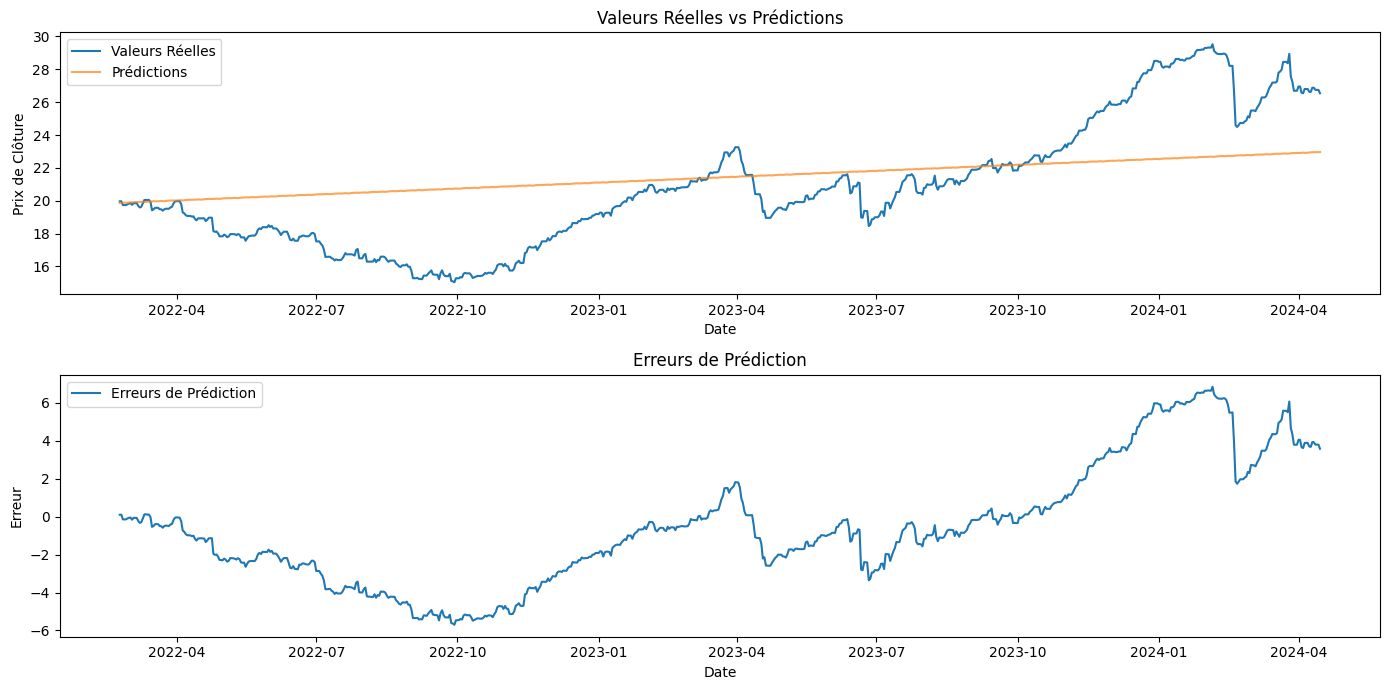

In [98]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, predictions, label='Prédictions', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - predictions, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

## Modele GARCH

In [99]:
# Charger les données
eurzmw_data = df_model

In [100]:
# Ajouter RSI, MACD, Bollinger Bands, ATR et Log Returns
eurzmw_data['RSI'] = ta.momentum.rsi(eurzmw_data['Close'], window=14)
eurzmw_data['MACD'] = ta.trend.macd(eurzmw_data['Close'])
eurzmw_data['MACD Signal'] = ta.trend.macd_signal(eurzmw_data['Close'])
eurzmw_data['MACD Hist'] = ta.trend.macd_diff(eurzmw_data['Close'])
eurzmw_data['7D MA'] = eurzmw_data['Close'].rolling(window=7).mean()
eurzmw_data['30D MA'] = eurzmw_data['Close'].rolling(window=30).mean()
eurzmw_data['Bollinger High'] = ta.volatility.bollinger_hband(eurzmw_data['Close'], window=20)
eurzmw_data['Bollinger Low'] = ta.volatility.bollinger_lband(eurzmw_data['Close'], window=20)
eurzmw_data['ATR'] = ta.volatility.average_true_range(eurzmw_data['High'], eurzmw_data['Low'], eurzmw_data['Close'], window=14)
eurzmw_data['Log Returns'] = np.log(eurzmw_data['Close'] / eurzmw_data['Close'].shift(1))

In [101]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurzmw_data.dropna(inplace=True)


In [102]:
# Vérification de la stationnarité et transformation des données
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] > 0.05:
        print("La série n'est pas stationnaire")
    else:
        print("La série est stationnaire")


In [103]:
# Vérification initiale
check_stationarity(eurzmw_data['Log Returns'])


ADF Statistic: -34.39834569947339
p-value: 0.0
La série est stationnaire


In [104]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurzmw_data.dropna(inplace=True)

In [105]:
# Séparation des données en train et test
train_size = int(len(eurzmw_data) * 0.8)
train_data = eurzmw_data['Log Returns'][:train_size]
test_data = eurzmw_data['Log Returns'][train_size:]

In [106]:
# Ajustement du modèle GARCH sur les données d'entraînement
model = arch_model(train_data, vol='Garch', p=1, q=1)
model_fit = model.fit(disp='off')
print(model_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            Log Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7249.55
Distribution:                  Normal   AIC:                          -14491.1
Method:            Maximum Likelihood   BIC:                          -14468.3
                                        No. Observations:                 2206
Date:                Tue, May 28 2024   Df Residuals:                     2205
Time:                        15:26:03   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         7.1713e-04  5.143e-06    139.434      0.000 [7.

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001245. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [107]:
# Prédictions pour les 30 prochains jours
forecast = model_fit.forecast(horizon=30)
forecast_mean = forecast.mean.values[-1, :]
forecast_variance = forecast.variance.values[-1, :]

In [108]:
# Prédictions pour les rendements
forecast_returns = pd.Series(forecast_mean, index=pd.date_range(start=train_data.index[-1], periods=30, freq='D'))

In [109]:
# Inverser les rendements logarithmiques pour obtenir les prix prévus
last_price = eurzmw_data['Close'].iloc[train_size - 1]
forecast_prices = last_price * np.exp(forecast_returns.cumsum())

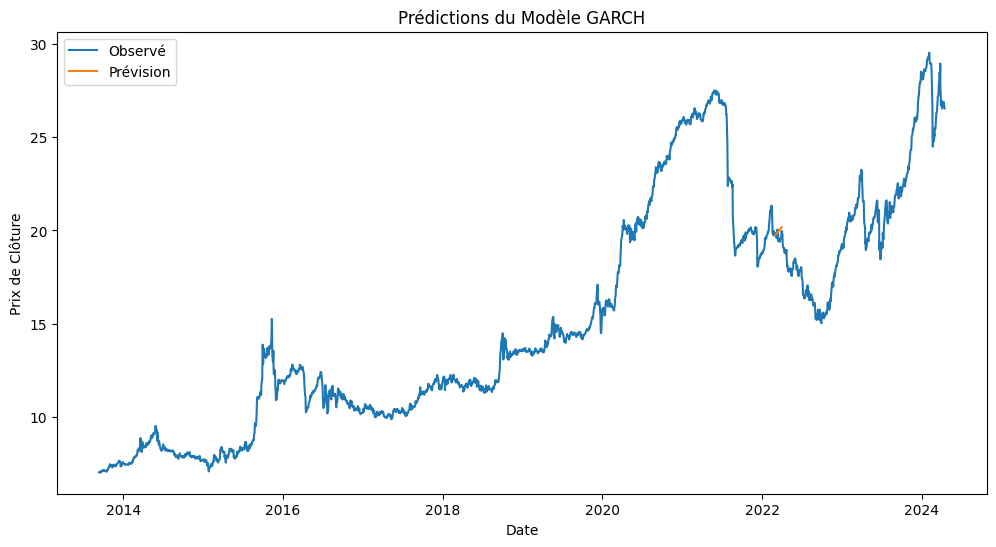

In [110]:
# Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.plot(eurzmw_data.index, eurzmw_data['Close'], label='Observé')
plt.plot(forecast_prices.index, forecast_prices, label='Prévision')
plt.legend()
plt.title('Prédictions du Modèle GARCH')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.show()

In [111]:
# Évaluation du modèle sur les données de test
train_size = int(len(eurzmw_data) * 0.8)
train_data, test_data = eurzmw_data['Log Returns'][:train_size], eurzmw_data['Log Returns'][train_size:]


In [112]:
# Ajustement du modèle sur les données d'entraînement
model = arch_model(train_data, vol='Garch', p=1, q=1)
model_fit = model.fit(disp='off')
predictions_diff = model_fit.forecast(horizon=len(test_data)).mean.values[-1, :]
predictions_diff_series = pd.Series(predictions_diff, index=test_data.index)

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001245. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [113]:
# Inverser les rendements logarithmiques pour obtenir les prix prévus
predictions_prices = eurzmw_data['Close'].iloc[train_size - 1] * np.exp(predictions_diff_series.cumsum())

In [114]:
# Correspondance des index pour y_test et predictions
y_test = eurzmw_data['Close'].iloc[train_size:train_size + len(predictions_prices)]


In [115]:
# Évaluation des performances
mse_garch = mean_squared_error(y_test, predictions_prices)
mae_garch = mean_absolute_error(y_test, predictions_prices)
rmse_garch = np.sqrt(mse_garch)
r2_garch = r2_score(y_test, predictions_prices)

print(f'Mean Squared Error: {mse_garch}')
print(f'Mean Absolute Error: {mae_garch}')
print(f'Root Mean Squared Error: {rmse_garch}')
print(f'R-squared: {r2_garch}')

Mean Squared Error: 15.569304701207962
Mean Absolute Error: 3.4914894991353864
Root Mean Squared Error: 3.945795826092369
R-squared: -0.07410834912588893


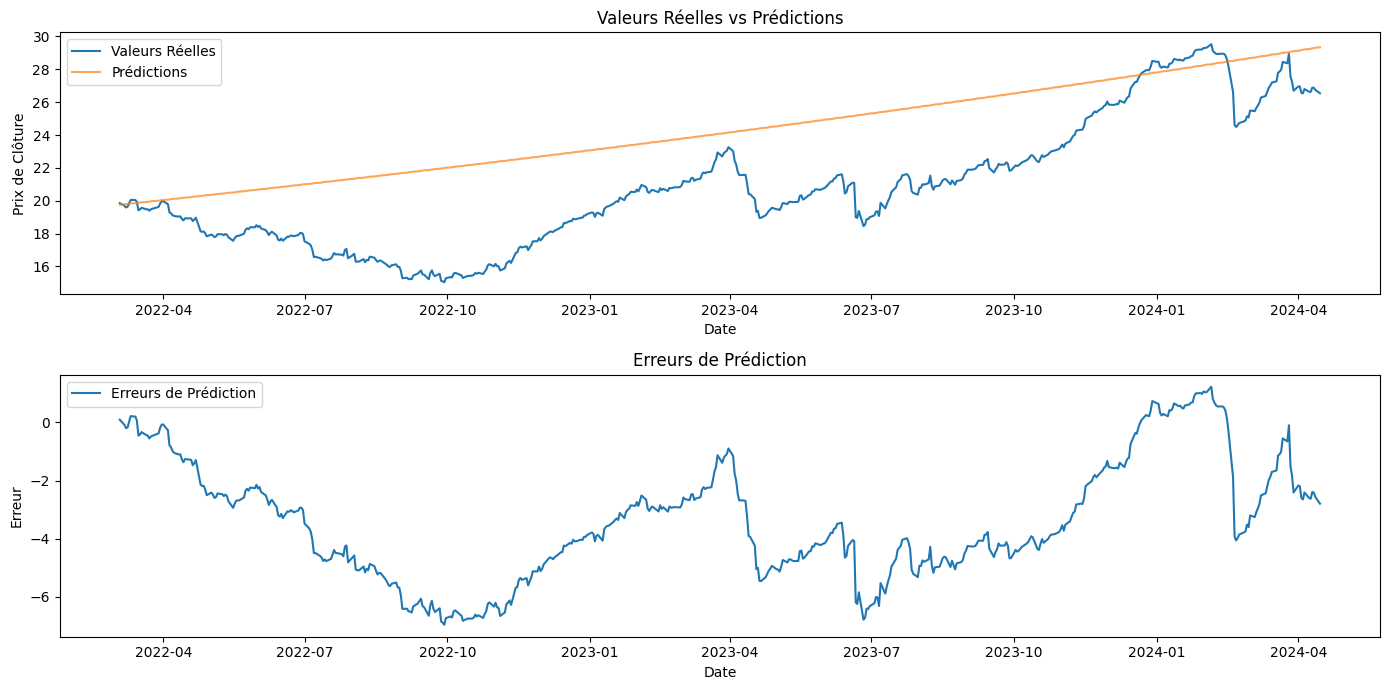

In [116]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, predictions_prices, label='Prédictions', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - predictions_prices, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

# Comparaison et selection du meilleur modèle.

In [117]:
# Création d'un dictionnaire avec les métriques des différents modèles
results = {
    'Modèle': ['Random Forest', 'Random Forest Grid Search', 'XGBoost', 'XGBoost Grid Search', 'LSTM', 'Prophet', 'ARIMA', 'SARIMA', 'GARCH'],
    'MSE': [mse_forest, mse_forest_grid, mse_xgb, mse_xgb_grid, mse_lstm, mse_prophet, mse_arima, mse_sarima, mse_garch],
    'MAE': [mae_forest, mae_forest_grid, mae_xgb, mae_xgb_grid, mae_lstm, mae_prophet, mae_arima, mae_sarima, mae_garch],
    'RMSE': [rmse_forest, rmse_forest_grid, rmse_xgb, rmse_xgb_grid, rmse_lstm, rmse_prophet, rmse_arima, rmse_sarima, rmse_garch],
    'R2': [r2_forest, r2_forest_grid, r2_xgb, r2_xgb_grid, r2_lstm, r2_prophet, r2_arima, r2_sarima, r2_garch]
}

# Création du DataFrame
results_df = pd.DataFrame(results)

# Affichage du DataFrame
print(results_df)

                      Modèle         MSE        MAE       RMSE         R2
0              Random Forest   11.916149   2.726946   3.451978  -0.310215
1  Random Forest Grid Search    0.232338   0.297317   0.482015   0.984476
2                    XGBoost    0.233176   0.284201   0.482883   0.984420
3        XGBoost Grid Search    0.271867   0.308681   0.521409   0.981835
4                       LSTM    0.291449   0.379620   0.539860   0.981040
5                    Prophet    0.617489   0.569387   0.785805  -0.085610
6                      ARIMA  834.811375  23.787973  28.893103 -57.042348
7                     SARIMA    9.862070   2.511154   3.140393   0.314315
8                      GARCH   15.569305   3.491489   3.945796  -0.074108


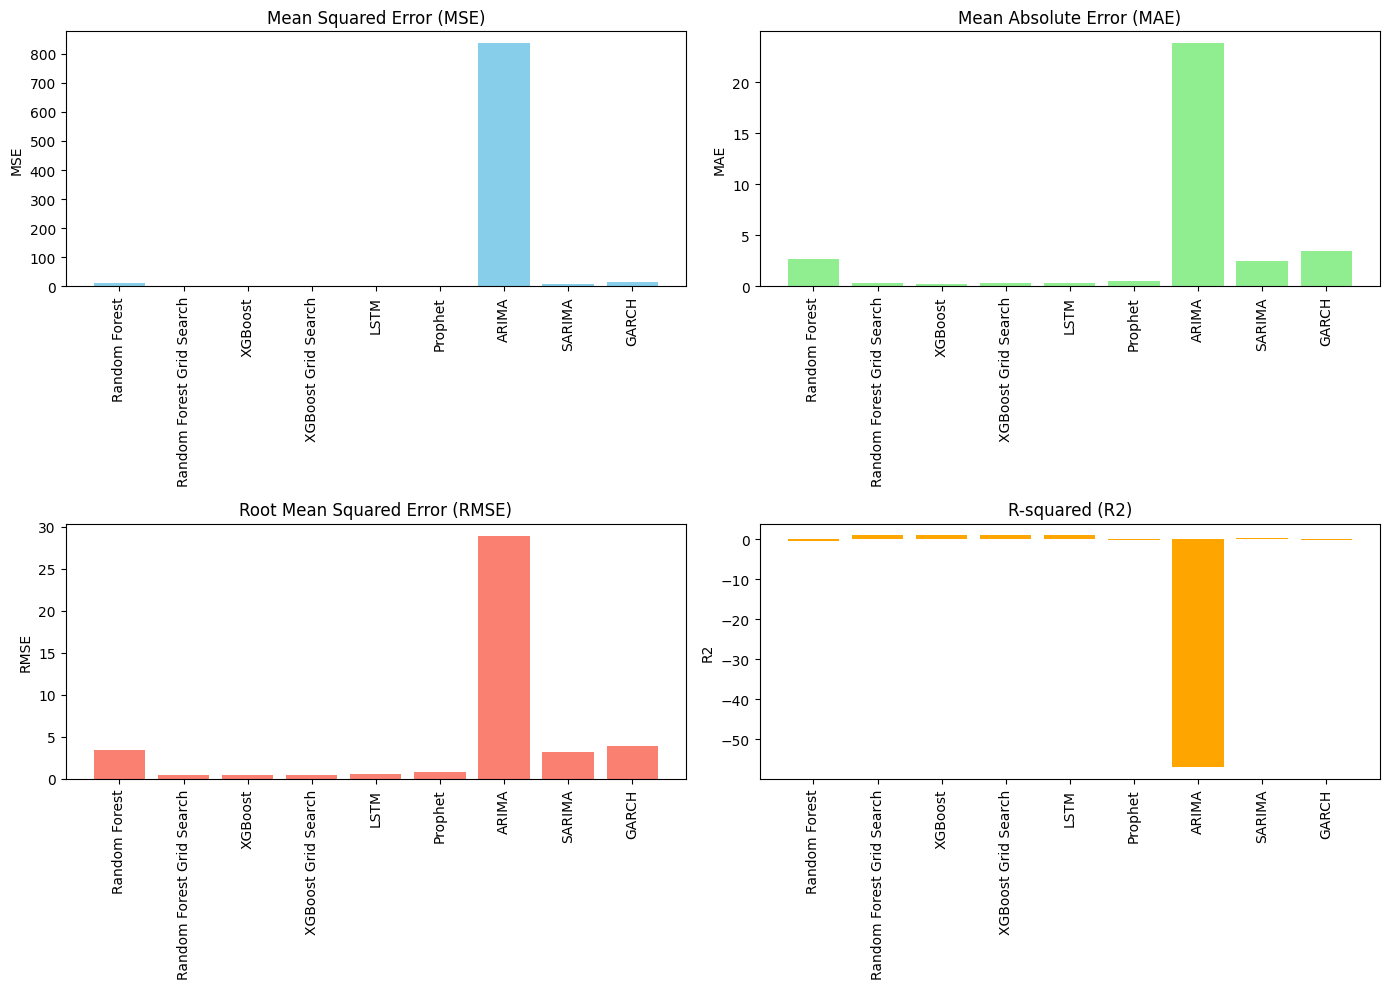

In [118]:
# Configuration de la taille de la figure
plt.figure(figsize=(14, 10))

# Graphique pour MSE
plt.subplot(2, 2, 1)
plt.bar(results_df['Modèle'], results_df['MSE'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

# Graphique pour MAE
plt.subplot(2, 2, 2)
plt.bar(results_df['Modèle'], results_df['MAE'], color='lightgreen')
plt.xticks(rotation=90)
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

# Graphique pour RMSE
plt.subplot(2, 2, 3)
plt.bar(results_df['Modèle'], results_df['RMSE'], color='salmon')
plt.xticks(rotation=90)
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')

# Graphique pour R2
plt.subplot(2, 2, 4)
plt.bar(results_df['Modèle'], results_df['R2'], color='orange')
plt.xticks(rotation=90)
plt.title('R-squared (R2)')
plt.ylabel('R2')

plt.tight_layout()
plt.show()


* Les modèles optimisés comme Random Forest Grid Search et XGBoost Grid Search montrent les meilleures performances globales avec des MSE, MAE, et RMSE très bas et des R² très élevés. 

* Le LSTM est également performant. 

* Les modèles ARIMA et GARCH affichent des performances médiocres et ne sont pas recommandés pour ce type de prévision. Les modèles SARIMA et Prophet ont des performances intermédiaires, mais ne sont pas aussi efficaces que les modèles optimisés de Random Forest et XGBoost.

Pour une gestion optimale et des prévisions précises, nous nous concentrerons sur les modèles Random Forest et XGBoost avec optimisation par Grid Search.

# Stacking de modèles

## Random ForestGS/GXBoostGS

L'utilisation du stacking des modèles Random Forest, XGBoost, et LSTM permet de combiner leurs forces pour mieux capter les dynamiques de la paire EUR/ZMW. Random Forest et XGBoost, optimisés via GridSearchCV, excellent dans la gestion des données financières structurées. 

En testant ce stacking, nous cherchons à exploiter ces avantages complémentaires pour améliorer la précision des prédictions de volatilité et des prix de clôture, espérant ainsi réduire les erreurs et renforcer la robustesse des prévisions.

In [26]:
# Charger les données
eurzmw_data = df_model

In [28]:
# Ajouter RSI, MACD, Bollinger Bands, ATR et Log Returns
eurzmw_data['RSI'] = ta.momentum.RSIIndicator(eurzmw_data['Close'], window=14).rsi()
macd = ta.trend.MACD(eurzmw_data['Close'])
eurzmw_data['MACD'] = macd.macd()
eurzmw_data['MACD Signal'] = macd.macd_signal()
eurzmw_data['MACD Hist'] = macd.macd_diff()
bollinger = ta.volatility.BollingerBands(eurzmw_data['Close'], window=20)
eurzmw_data['Bollinger High'] = bollinger.bollinger_hband()
eurzmw_data['Bollinger Mid'] = bollinger.bollinger_mavg()
eurzmw_data['Bollinger Low'] = bollinger.bollinger_lband()
eurzmw_data['ATR'] = ta.volatility.AverageTrueRange(high=eurzmw_data['High'], low=eurzmw_data['Low'], close=eurzmw_data['Close'], window=14).average_true_range()
eurzmw_data['Log Returns'] = np.log(eurzmw_data['Close'] / eurzmw_data['Close'].shift(1))


In [29]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurzmw_data.dropna(inplace=True)


In [30]:
# Décomposition de la série temporelle (période de 30 jours)
decomposition = seasonal_decompose(eurzmw_data['Close'], model='multiplicative', period=30)
eurzmw_data['Trend'] = decomposition.trend
eurzmw_data['Seasonal'] = decomposition.seasonal
eurzmw_data['Resid'] = decomposition.resid

In [31]:
# Extraction des caractéristiques temporelles depuis l'index
eurzmw_data['Day'] = eurzmw_data.index.day
eurzmw_data['Month'] = eurzmw_data.index.month
eurzmw_data['Year'] = eurzmw_data.index.year

In [32]:
# Ajouter des décalages temporels comme caractéristiques
eurzmw_data['Lag1'] = eurzmw_data['Close'].shift(1)
eurzmw_data['Lag2'] = eurzmw_data['Close'].shift(2)

In [33]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurzmw_data.dropna(inplace=True)


In [43]:
# Préparation des caractéristiques et de la cible
features = ['Day', 'Month', 'Year', 'RSI', 'MACD', 'MACD Signal', 'MACD Hist', 'Lag1', 'Lag2', '7D MA', '30D MA']
X = eurzmw_data[features]
y = eurzmw_data['Close']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



In [44]:
# Paramètres pour GridSearchCV
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest avec Grid Search
rf_grid = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                       param_grid=rf_params,
                       cv=TimeSeriesSplit(n_splits=5),
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_


In [45]:
# Paramètres pour GridSearchCV
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# XGBoost avec Grid Search
xgb_grid = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                        param_grid=xgb_params,
                        cv=TimeSeriesSplit(n_splits=5),
                        scoring='neg_mean_squared_error',
                        n_jobs=-1)
xgb_grid.fit(X_train, y_train)
best_xgb_model = xgb_grid.best_estimator_


In [48]:
# Définition du modèle de stacking
stacking_model = StackingRegressor(
    estimators=[
        ('rf', best_rf_model),
        ('xgb', best_xgb_model)
    ],
    final_estimator=LinearRegression()
)

# Entraînement du modèle de stacking
stacking_model.fit(X_train, y_train)


StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=30,
                                                     min_samples_split=5,
                                                     random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1.0, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=LinearRegression())

In [49]:
# Prédictions du modèle de stacking
stacking_pred = stacking_model.predict(X_test)

# Calcul des erreurs du modèle de stacking
mse_stacking = mean_squared_error(y_test, stacking_pred)
mae_stacking = mean_absolute_error(y_test, stacking_pred)
rmse_stacking = np.sqrt(mse_stacking)
r2_stacking = r2_score(y_test, stacking_pred)

print(f'Stacking - Mean Squared Error: {mse_stacking}')
print(f'Stacking - Mean Absolute Error: {mae_stacking}')
print(f'Stacking - Root Mean Squared Error: {rmse_stacking}')
print(f'Stacking - R-squared: {r2_stacking}')



Stacking - Mean Squared Error: 7.422990442743534
Stacking - Mean Absolute Error: 2.6208774709400817
Stacking - Root Mean Squared Error: 2.724516552114069
Stacking - R-squared: 0.5065718303253686


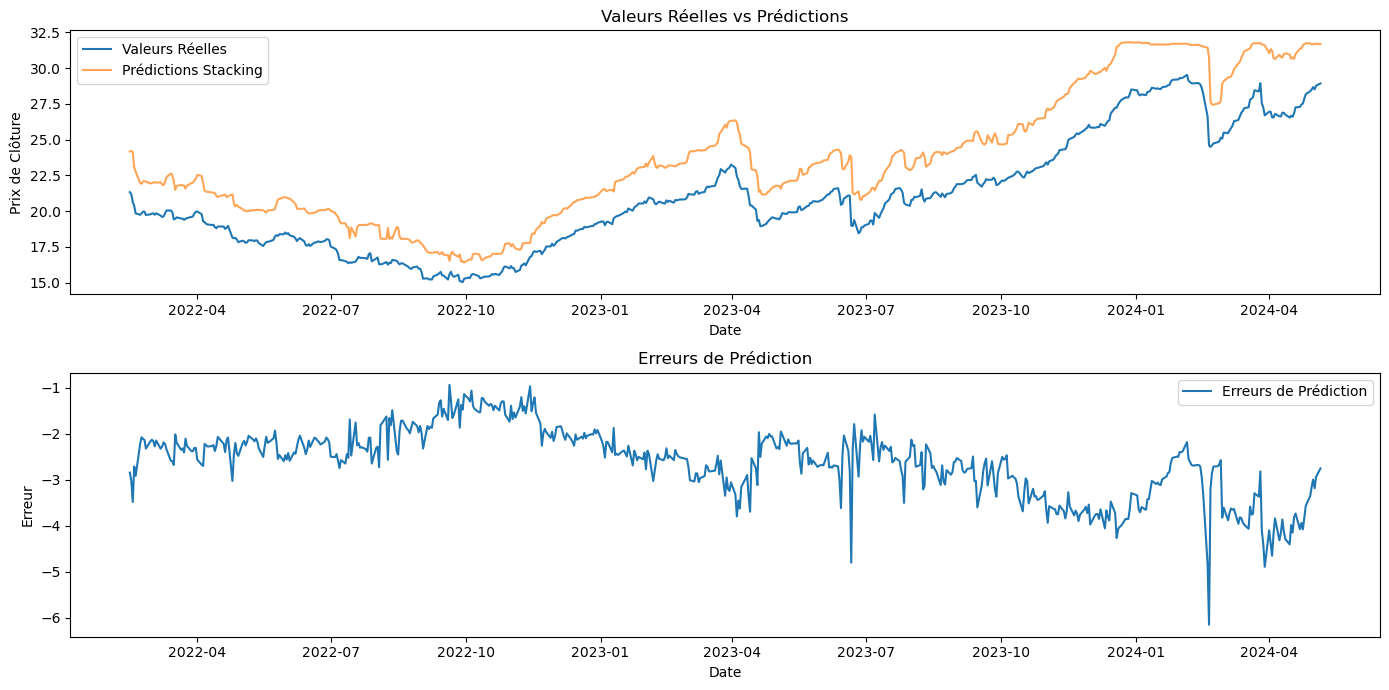

In [50]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, stacking_pred, label='Prédictions Stacking', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - stacking_pred, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

Les réulstats du modèles ont fortement chutés par rapports aux résultats individuelles de chacun des modèles. La solution n'est pas viable.

## Random ForestGS/GXBoostGS/LSTM 

Essayons de rajouter LSTM qui est particulièrement adapté pour les séquences temporelles complexes et qui a également obtenus de très bons résultats individuellement.

In [51]:
# Charger les données
eurzmw_data = df_model

# Ajouter RSI, MACD, Bollinger Bands, ATR et Log Returns
eurzmw_data['RSI'] = ta.momentum.RSIIndicator(eurzmw_data['Close'], window=14).rsi()
macd = ta.trend.MACD(eurzmw_data['Close'])
eurzmw_data['MACD'] = macd.macd()
eurzmw_data['MACD Signal'] = macd.macd_signal()
eurzmw_data['MACD Hist'] = macd.macd_diff()
bollinger = ta.volatility.BollingerBands(eurzmw_data['Close'], window=20)
eurzmw_data['Bollinger High'] = bollinger.bollinger_hband()
eurzmw_data['Bollinger Mid'] = bollinger.bollinger_mavg()
eurzmw_data['Bollinger Low'] = bollinger.bollinger_lband()
eurzmw_data['ATR'] = ta.volatility.AverageTrueRange(high=eurzmw_data['High'], low=eurzmw_data['Low'], close=eurzmw_data['Close'], window=14).average_true_range()
eurzmw_data['Log Returns'] = np.log(eurzmw_data['Close'] / eurzmw_data['Close'].shift(1))

In [ ]:
# Ajouter des moyennes mobiles
eurzmw_data['7D MA'] = eurzmw_data['Close'].rolling(window=7).mean()
eurzmw_data['30D MA'] = eurzmw_data['Close'].rolling(window=30).mean()

In [ ]:
# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurzmw_data.dropna(inplace=True)

In [ ]:
# Décomposition de la série temporelle (période de 30 jours)
decomposition = seasonal_decompose(eurzmw_data['Close'], model='multiplicative', period=30)
eurzmw_data['Trend'] = decomposition.trend
eurzmw_data['Seasonal'] = decomposition.seasonal
eurzmw_data['Resid'] = decomposition.resid

In [ ]:
# Extraction des caractéristiques temporelles depuis l'index
eurzmw_data['Day'] = eurzmw_data.index.day
eurzmw_data['Month'] = eurzmw_data.index.month
eurzmw_data['Year'] = eurzmw_data.index.year

In [ ]:
# Ajouter des décalages temporels comme caractéristiques
eurzmw_data['Lag1'] = eurzmw_data['Close'].shift(1)
eurzmw_data['Lag2'] = eurzmw_data['Close'].shift(2)

# Supprimer les valeurs manquantes après avoir ajouté toutes les caractéristiques
eurzmw_data.dropna(inplace=True)

In [52]:
# Préparation des caractéristiques et de la cible
features = ['Day', 'Month', 'Year', 'RSI', 'MACD', 'MACD Signal', 'MACD Hist', 'Lag1', 'Lag2', '7D MA', '30D MA']
X = eurzmw_data[features]
y = eurzmw_data['Close']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



In [53]:
# Paramètres pour GridSearchCV
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest avec Grid Search
rf_grid = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                       param_grid=rf_params,
                       cv=TimeSeriesSplit(n_splits=5),
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_


In [54]:
# Paramètres pour GridSearchCV
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# XGBoost avec Grid Search
xgb_grid = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                        param_grid=xgb_params,
                        cv=TimeSeriesSplit(n_splits=5),
                        scoring='neg_mean_squared_error',
                        n_jobs=-1)
xgb_grid.fit(X_train, y_train)
best_xgb_model = xgb_grid.best_estimator_


In [55]:
# Normalisation des données
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(eurzmw_data[['Close', 'RSI', 'MACD', 'MACD Signal', 'MACD Hist', 'Lag1', 'Lag2', '7D MA', '30D MA']])

Epoch 1/20


c:\Users\33671\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 0.0108 - val_loss: 9.3663e-04
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0012 - val_loss: 7.2934e-04
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 8.2449e-04 - val_loss: 7.3442e-04
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 7.4145e-04 - val_loss: 8.8720e-04
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 6.9355e-04 - val_loss: 6.5291e-04
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 7.4570e-04 - val_loss: 4.8051e-04
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0010 - val_loss: 5.1158e-04
Epoch 9/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 5.9950e-04 - val_loss: 0.0020
Epoch 10/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 9.7379e-04 - val_loss: 0.0017
Epoch 11/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 4.9613e-04 - val_loss: 4.5834e-04
Epoch 12/20
70

In [ ]:
# Division en train et test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [ ]:
# Création des séquences de données pour LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step)])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60  # Ajustement du time_step
X_train_lstm, y_train_lstm = create_dataset(train_data, time_step)
X_test_lstm, y_test_lstm = create_dataset(test_data, time_step)

In [ ]:
# Reshape des données pour LSTM [samples, time steps, features]
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], X_train_lstm.shape[2])
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], X_test_lstm.shape[2])

In [ ]:
 # Modèle LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(100, return_sequences=True, input_shape=(time_step, X_train_lstm.shape[2])))
lstm_model.add(LSTM(100, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(50))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train_lstm, batch_size=32, epochs=20, validation_data=(X_test_lstm, y_test_lstm))

In [ ]:
# Prédictions
train_predict_lstm = lstm_model.predict(X_train_lstm)
test_predict_lstm = lstm_model.predict(X_test_lstm)

In [ ]:
# Inverser la normalisation pour obtenir les valeurs réelles
train_predict_lstm = scaler.inverse_transform(np.concatenate((train_predict_lstm, np.zeros((train_predict_lstm.shape[0], X_train_lstm.shape[2] - 1))), axis=1))[:, 0]
test_predict_lstm = scaler.inverse_transform(np.concatenate((test_predict_lstm, np.zeros((test_predict_lstm.shape[0], X_test_lstm.shape[2] - 1))), axis=1))[:, 0]

In [ ]:
# Ajuster les dimensions pour le stacking
lstm_pred_train = pd.Series(train_predict_lstm, index=y_train.index[time_step+1:len(train_predict_lstm) + time_step+1])
lstm_pred_test = pd.Series(test_predict_lstm, index=y_test.index[time_step+1:len(test_predict_lstm) + time_step+1])

In [57]:
# Réindexation des prédictions LSTM pour qu'elles s'alignent avec les autres prédictions
lstm_pred_train = lstm_pred_train.reindex(y_train.index).fillna(method='bfill').fillna(method='ffill')
lstm_pred_test = lstm_pred_test.reindex(y_test.index).fillna(method='bfill').fillna(method='ffill')


In [58]:
# Combiner les prédictions des modèles optimisés et LSTM pour l'entraînement du modèle de stacking
train_meta_features = np.column_stack([best_rf_model.predict(X_train), best_xgb_model.predict(X_train), lstm_pred_train])
test_meta_features = np.column_stack([best_rf_model.predict(X_test), best_xgb_model.predict(X_test), lstm_pred_test])


In [59]:
# Modèle de stacking
stacking_model = LinearRegression()
stacking_model.fit(train_meta_features, y_train)


LinearRegression()

In [60]:
# Prédictions du modèle de stacking
stacking_pred = stacking_model.predict(test_meta_features)


In [63]:
# Calcul des erreurs du modèle de stacking
mse_stacking_LSTM_RF_Boost = mean_squared_error(y_test, stacking_pred)
mae_stacking_LSTM_RF_Boost = mean_absolute_error(y_test, stacking_pred)
rmse_stacking_LSTM_RF_Boost= np.sqrt(mse_stacking)
r2_stacking_LSTM_RF_Boost = r2_score(y_test, stacking_pred)

print(f'Stacking - Mean Squared Error: {mse_stacking_LSTM_RF_Boost}')
print(f'Stacking - Mean Absolute Error: {mae_stacking_LSTM_RF_Boost}')
print(f'Stacking - Root Mean Squared Error: {rmse_stacking_LSTM_RF_Boost}')
print(f'Stacking - R-squared: {r2_stacking_LSTM_RF_Boost}')

Stacking - Mean Squared Error: 0.23963614726779375
Stacking - Mean Absolute Error: 0.3076234194794358
Stacking - Root Mean Squared Error: 0.489526452061371
Stacking - R-squared: 0.9829820673960153


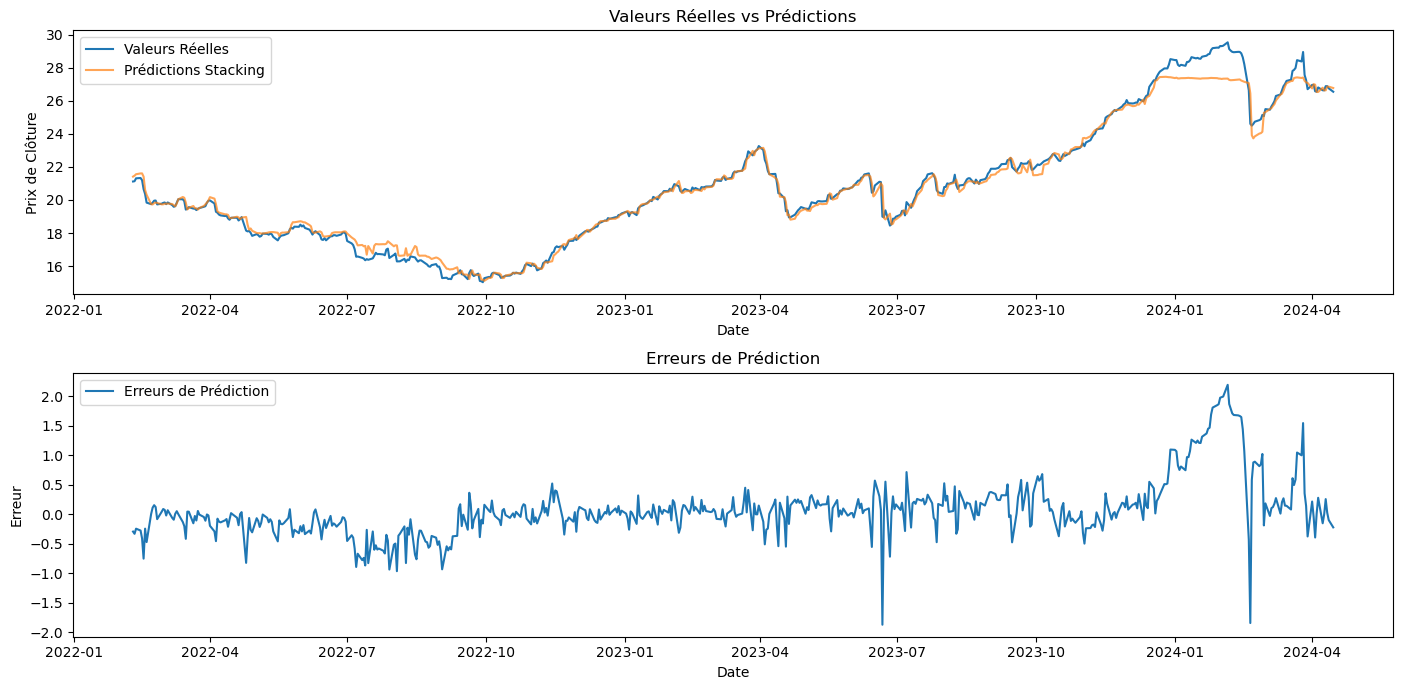

In [64]:
# Visualisation des performances
plt.figure(figsize=(14, 7))

# Valeurs réelles vs prédictions
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, stacking_pred, label='Prédictions Stacking', alpha=0.7)
plt.title('Valeurs Réelles vs Prédictions')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.legend()

# Erreurs de prédiction
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test - stacking_pred, label='Erreurs de Prédiction')
plt.title('Erreurs de Prédiction')
plt.xlabel('Date')
plt.ylabel('Erreur')
plt.legend()

plt.tight_layout()
plt.show()

Le modèle de stacking offre une bonne performance, mais n'améliore pas significativement les résultats par rapport aux meilleurs modèles individuels.

# Optimisation du meilleur modèle: Random Forest GS